**Описание проекта**

Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта

**Шаг 1.** Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv. Скачать датасет

**Шаг 2.** Подготовьте данные

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3.** Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение
по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4.** Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5.** Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

## Предобработка данных

In [1]:
# импортируем библиотеки, которые потребуются в исследовании
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import statistics

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Переименуем столбцы, названные не по правилам хорошего оформления

In [4]:
for column in data.columns:
    data = data.rename(columns={column : column.lower()})

Теперь столбцы названы так, как нужно. Посмотрим какие типы данных содержатся в столбцах

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пройдёмся по столбцам с левого края до правого: столбец **name** - к нему сложно найти вопросы, да и есть всего 2 пропуска. Сложно сказать откуда они взялись, но просто скажем, что у игры пока нет названия, поэтому его и не добавили в этот датафрейм

In [7]:
data['name'] = data['name'].fillna('нет имени')

In [8]:
len(data['name'].unique())

11560

Можно сказать, что львиная доля игр в датафрейме - с уникальными названиями. Видимо игры с одним названием в разных строчках это игры, которые были выпущены на разные платформы.

In [9]:
data['name'] = data['name'].str.lower()

In [10]:
len(data['name'].unique())

11560

In [11]:
data['name'].value_counts()

need for speed: most wanted                           12
lego marvel super heroes                               9
madden nfl 07                                          9
fifa 14                                                9
ratatouille                                            9
                                                      ..
ncaa football 98                                       1
the chronicles of riddick: escape from butcher bay     1
onimusha 3: demon siege                                1
guitar freaks v2 & drummania v2                        1
the sims: unleashed                                    1
Name: name, Length: 11560, dtype: int64

Подумал, что возможно есть строки с одинаковыми названиями игр, но разными регстрами - но нет, имеем дело с действительно уникальнм набором из 11560 игр на разные платформы

Перейдём к столбцу **platform** - в нём нет пропусков, но возможно есть какие-нибудь странные значения?

In [12]:
len(data['platform'].unique())

31

In [13]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Честно говоря, даже не слышал о большей части из них, но по крайней мере тут нет чего-то вроде "NaN"

Столбец **year_of_release** - явно нужно перевести в int, однако в нём есть пропущенные значения

In [14]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

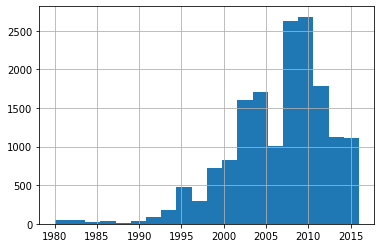

In [15]:
data['year_of_release'].hist(bins=20)

Значения выглядят вполне адекватно - игры из датафрейма выходили с 1980 года по 2016. Предпологаю, что пропущенные значения - это возможно игры, у которых еще просто нету даты релиза, и они только планируются к запуску. Заполним эти строки значениями "не было релиза"

In [16]:
data['year_of_release'] = data['year_of_release'].fillna('не было релиза')

In [17]:
indexes = list(data.index)
for index in indexes:
    if data.loc[index, 'year_of_release'] != 'не было релиза':
        data.loc[index, 'year_of_release'] = int(data.loc[index, 'year_of_release'])

In [18]:
data[data['year_of_release']=='не было релиза']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,не было релиза,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,не было релиза,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,не было релиза,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,не было релиза,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,не было релиза,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,не было релиза,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,не было релиза,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,не было релиза,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,не было релиза,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [19]:
data['year_of_release'].value_counts()

2008              1427
2009              1426
2010              1255
2007              1197
2011              1136
2006              1006
2005               939
2002               829
2003               775
2004               762
2012               653
2015               606
2014               581
2013               544
2016               502
2001               482
1998               379
2000               350
1999               338
1997               289
не было релиза     269
1996               263
1995               219
1994               121
1993                62
1981                46
1992                43
1991                41
1982                36
1986                21
1989                17
1983                17
1990                16
1987                16
1988                15
1985                14
1984                14
1980                 9
Name: year_of_release, dtype: int64

Теперь в пропущенных значениях указано, что у игры ещё не определена дата релиза, а если год релиза известен - он переведён в тип данных int

Рассмотрим столбец **genre** - в нём есть 2 пропуска

In [20]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

В принципе, значения выглядят довольно адекватно, и соответствуют названиям существующих жанров. Предлагаю тем 2 строкам, у которых значения пропущены, дать имя "жанр не определён"

In [21]:
data['genre'] = data['genre'].fillna('жанр не определён')

Изучим данные из столбца **na_sales** - продажи в Северной Америке в миллионах проданных копий. В нём нет пропусков и верно указан тип данных float для тех значений, которые в нём даны

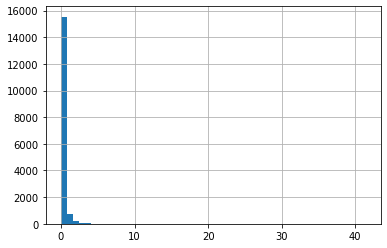

In [22]:
data['na_sales'].hist(bins=50)

In [23]:
data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Явно видно, что имеют место выбросы - очень большие значения, сильно выбивающиеся из общей картины. Однако в рамках данного исследования как минимум потребуется считать суммарную прибыль от всех столбцов в исходном датафрейме, и если убирать строки с такими выбросами, то можем потрять важные весомые составляющие по данным о продажам, судя по всему, хитовых игр, изменивших рынок, так что предлагаю все строки оставить. Как минимум хватило просто убедиться, что в данном столбце нет отрицательных или совсем уж огромных значений, больших на несколько порядков чем остальные

In [24]:
display(data[data['na_sales'] == data['na_sales'].max()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Можем даже убедиться, что wii sports действительно на слуху и по настоящим данным вне исследоваемого датафрейма. Так что такие большие проадажи по нему в Америке вполне могут быть.

Посмотрим на распределение в следующем столбце - **eu_sales**, продажи в Европе

In [25]:
data['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

По максимальному значению можем заметить, что тут опять царит wii sports

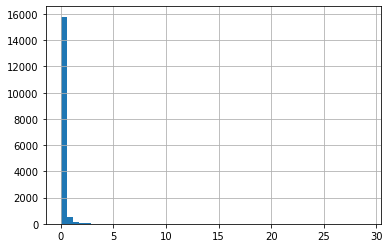

In [26]:
data['eu_sales'].hist(bins=50)

Посмотрим на картину распределения продаж без учёта гигантов типа wii sports

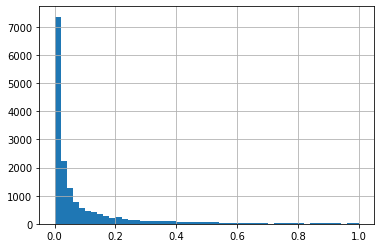

In [27]:
data['eu_sales'].hist(bins=50, range=(0, 1))

Как и с продажами в Америке - видно огромное скопление околонулевых продаж - можно сказать, что в среднем большинство игр меркнут на фоне малой доли сверхуспешных проектов, которые переваливают хотя бы за миллион проданных копий

Теперь оценим продажи в Японии в **jp_sales**

In [28]:
data['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

здесь лидирует даже не wii sports!

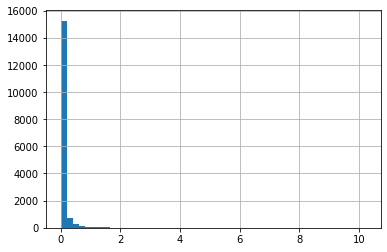

In [29]:
data['jp_sales'].hist(bins=50)

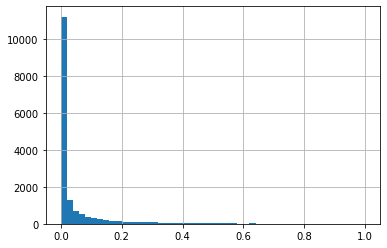

In [30]:
data['jp_sales'].hist(bins=50, range=(0, 1))

In [31]:
display(data[data['jp_sales'] == data['jp_sales'].max()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


Ожидаемый результат для Японии

Как и для Европы с Америкой похожая ситуация - есть гиганты с огромными продажами и огромная масса проектов, которые скапливаются в районе 0 продаж на гистограмме по сравнению с ними

И последний столбец, посвящённый продажам - **other_sales** - продажи в других странах кроме рассмотренных Северной Америки, Европы и Японии

In [32]:
data['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

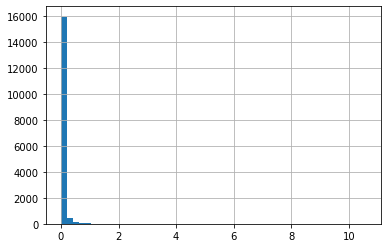

In [33]:
data['other_sales'].hist(bins=50)

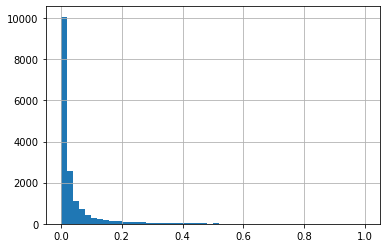

In [34]:
data['other_sales'].hist(bins=50, range=(0, 1))

In [35]:
display(data[data['other_sales'] == data['other_sales'].max()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,grand theft auto: san andreas,PS2,2004,Action,9.43,0.4,0.41,10.57,95.0,9,M


После оценки общей картины с проданными копиями по миру - можно перейти к оценке столбцов с рейтингами от критиков, игроков, и от организации ESRB

Ранее было замечено, что в данных столбцах довольно много пропусков, выведем текущее состояние по пропускам на экран

In [36]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Сначала разберёмся с оценкой критиков **critic_score**

In [37]:
list(data['critic_score'].unique())

[76.0,
 nan,
 82.0,
 80.0,
 89.0,
 58.0,
 87.0,
 91.0,
 61.0,
 97.0,
 95.0,
 77.0,
 88.0,
 83.0,
 94.0,
 93.0,
 85.0,
 86.0,
 98.0,
 96.0,
 90.0,
 84.0,
 73.0,
 74.0,
 78.0,
 92.0,
 71.0,
 72.0,
 68.0,
 62.0,
 49.0,
 67.0,
 81.0,
 66.0,
 56.0,
 79.0,
 70.0,
 59.0,
 64.0,
 75.0,
 60.0,
 63.0,
 69.0,
 50.0,
 25.0,
 42.0,
 44.0,
 55.0,
 48.0,
 57.0,
 29.0,
 47.0,
 65.0,
 54.0,
 20.0,
 53.0,
 37.0,
 38.0,
 33.0,
 52.0,
 30.0,
 32.0,
 43.0,
 45.0,
 51.0,
 40.0,
 46.0,
 39.0,
 34.0,
 35.0,
 41.0,
 36.0,
 28.0,
 31.0,
 27.0,
 26.0,
 19.0,
 23.0,
 24.0,
 21.0,
 17.0,
 22.0,
 13.0]

Видно, что непропущенные значения это по факту int, а не заявленный float - десятичная часть везде нулевая. Можем сделать подобную операцию как с годом релиза - заполнить пропуски значением "нет рейтинга" , а всё остальное перевести в int.

У меня позже появилась довольно неплохая идея, что по факту, так как игры судя по всему в датафрейме добавлены по несколько раз для разных платформ, что мы могли бы посмотреть рейтинг игры для какой-то одной платформы, и добавить его в неизвестный рейтинг второй платформы этой же игры, но как часто бывает - игра может быть довольно хороша на одной платформе, но ужасно портирована на другую, так что эта логика не была бы реалистичной. Но просто хотел написать, что предполагал так сделать

In [38]:
data['critic_score'] = data['critic_score'].fillna('нет оценки критиков')

In [39]:
for index in indexes:
    if data.loc[index, 'critic_score'] != 'нет оценки критиков':
        data.loc[index, 'critic_score'] = int(data.loc[index, 'critic_score'])

Думаю, похожая логика будет и для столбца **user_score** - оценка пользователей

In [40]:
len(data['user_score'].unique())

97

In [41]:
list(data['user_score'].unique())

['8',
 nan,
 '8.3',
 '8.5',
 '6.6',
 '8.4',
 '8.6',
 '7.7',
 '6.3',
 '7.4',
 '8.2',
 '9',
 '7.9',
 '8.1',
 '8.7',
 '7.1',
 '3.4',
 '5.3',
 '4.8',
 '3.2',
 '8.9',
 '6.4',
 '7.8',
 '7.5',
 '2.6',
 '7.2',
 '9.2',
 '7',
 '7.3',
 '4.3',
 '7.6',
 '5.7',
 '5',
 '9.1',
 '6.5',
 'tbd',
 '8.8',
 '6.9',
 '9.4',
 '6.8',
 '6.1',
 '6.7',
 '5.4',
 '4',
 '4.9',
 '4.5',
 '9.3',
 '6.2',
 '4.2',
 '6',
 '3.7',
 '4.1',
 '5.8',
 '5.6',
 '5.5',
 '4.4',
 '4.6',
 '5.9',
 '3.9',
 '3.1',
 '2.9',
 '5.2',
 '3.3',
 '4.7',
 '5.1',
 '3.5',
 '2.5',
 '1.9',
 '3',
 '2.7',
 '2.2',
 '2',
 '9.5',
 '2.1',
 '3.6',
 '2.8',
 '1.8',
 '3.8',
 '0',
 '1.6',
 '9.6',
 '2.4',
 '1.7',
 '1.1',
 '0.3',
 '1.5',
 '0.7',
 '1.2',
 '2.3',
 '0.5',
 '1.3',
 '0.2',
 '0.6',
 '1.4',
 '0.9',
 '1',
 '9.7']

Обсуждаемый даже в условии задания *tbd* - это как я понимаю to be determined - "нуждающийся в уточнении". По сути в рамках исследования это ничем не отличается от nan, так что просто добавим его в логику прогонки цикла для замены неизвестных значений на "нет оценки пользователей". Единственное, тут тип данных уже будет конечно float, а не int

In [42]:
data['user_score'] = data['user_score'].fillna('нет оценки пользователей')

In [43]:
for index in indexes:
    if data.loc[index, 'user_score'] == 'tbd':
        data.loc[index, 'user_score'] = 'нет оценки пользователей'
    elif data.loc[index, 'user_score'] != 'нет оценки пользователей':
        data.loc[index, 'user_score'] = float(data.loc[index, 'user_score'])

И остаётся последний столбец **rating** - рейтинг от организации, присваивающей подходящую возрастную категорию. В этом столбце тоже множество пропусков

In [44]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

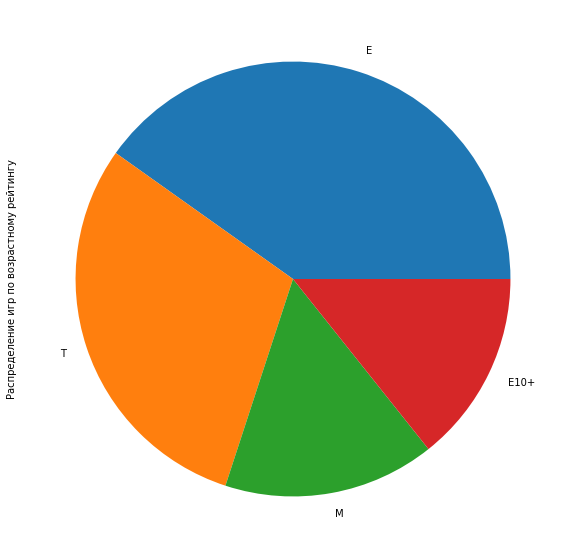

In [45]:
most_popular_categories = ['E', 'T', 'M', 'E10+']
data.query('rating in @most_popular_categories')['rating'].value_counts().plot(kind='pie', label='Распределение игр по возрастному рейтингу', figsize=(20,10))
plt.show()

В принципе, все эти рейтинги дейтствительно можно нагуглить, и если анализ по ним пригодиться в дальнейшем исследовании, то эти значения вполне можно будет конкретезировать и расшифровать

Здесь уже может сработать логика, что если для одноименной игры на одной из платформ известен возрастной рейтинг, то он скорее всего не изменился при портировании игру на другую платформу

Выведем строчки с заполненными значениями рейтинга:

In [46]:
data_ratings = data.copy(deep=True)
data_ratings = data_ratings[['name', 'rating']].dropna().drop_duplicates().reset_index(drop=True)
display(data_ratings)

,name,rating
0,wii sports,E
1,mario kart wii,E
2,wii sports resort,E
3,new super mario bros.,E
4,wii play,E
...,...,...
6241,breach,T
6242,bust-a-move 3000,E
6243,mega brain boost,E
6244,storm: frontline nation,E10+


In [47]:
games_with_rating = list(data_ratings['name'].unique())

Мы сохранили в список те игры, для которых известен рейтинг. Выведем на экран датафрейм, где **name** состоит только из этих игр. Если в нём нет пропусков, то изначальный датафрейм заполнен по максимуму данными, и все строки без прописанной категории - это строки где действительно для игры неизвестен рейтинг

In [48]:
display(data.query('name in @games_with_rating').reset_index(drop=True))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
2,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
3,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
4,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
10381,bust-a-move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53,нет оценки пользователей,E
10382,mega brain boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48,нет оценки пользователей,E
10383,storm: frontline nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60,7.2,E10+
10384,plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,нет оценки критиков,нет оценки пользователей,E


In [49]:
data.query('name in @games_with_rating').reset_index(drop=True).isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating             437
dtype: int64

Предположение оказалось верным - в датафрейме действительно есть игры, где рейтинг известен, по всей видимости на одной из платформ, но при этом для игры с таким же названием он не указан. Заполним для игр с одинаковым именем их значение рейтинга

Создадим словарь, в котором для каждой игры будет её рейтинг

In [50]:
rating_dict = data_ratings.set_index('name')['rating'].to_dict()

Теперь напишем функцию, которая пройдется по данному словарю и заполнит для всех игр их рейтинг, если он известен

In [51]:
def fullfill_ratings(data):
    global games_with_rating
    if data['name'] in games_with_rating:
        return rating_dict[data['name']]
    else:
        return 'рейтинга нет'


data['rating'] = data.apply(fullfill_ratings, axis=1)

In [52]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,нет оценки критиков,нет оценки пользователей,рейтинга нет
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,нет оценки критиков,нет оценки пользователей,рейтинга нет
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет


In [53]:
data['rating'].value_counts()

рейтинга нет    6329
E               4374
T               2898
M               1619
E10+            1472
EC                10
RP                 6
AO                 4
K-A                3
Name: rating, dtype: int64

Теперь всё верно - там, где были известны рейтинги игры по данным с другой платформы, - они были добавлены. Если же о рейтинге игры вообще нет упоминания ни на одной из платформ, то тут уж было никак не дополнить данные

Выведем финальные данные о получившемся датафрейме, с которым будем в дальнейшем работать:

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null object
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null object
user_score         16715 non-null object
rating             16715 non-null object
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [55]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В первой части проекта осталось только вывести суммарные продажи во всех регионах в отдельный столбец

In [56]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [57]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,нет оценки критиков,нет оценки пользователей,рейтинга нет,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Как я понимаю, тут речь идёт о гистограмме, которую я выводил ранее

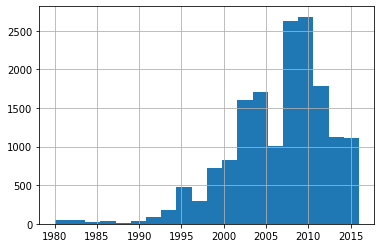

In [58]:
data[data['year_of_release'] != 'не было релиза']['year_of_release'].hist(bins=20)

In [59]:
games_per_year = data[data['year_of_release'] != 'не было релиза'].groupby('year_of_release')['year_of_release'].count()
display(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

In [60]:
years = list(games_per_year.index)

In [61]:
number_of_games = []
for year in years:
    number_of_games.append(games_per_year[year])

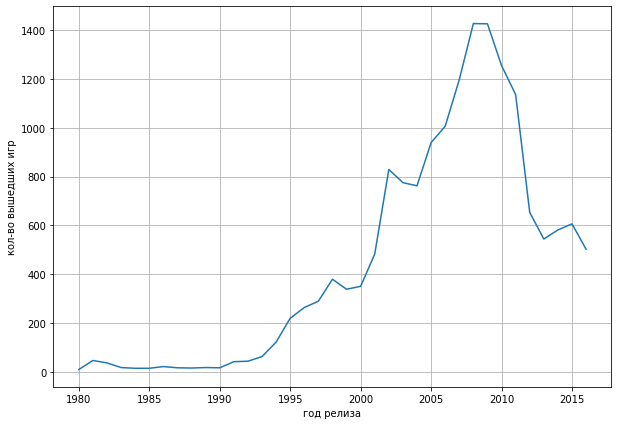

In [62]:
plt.figure(figsize=(10,7))
plt.plot(years, number_of_games)
plt.grid()
plt.xlabel('год релиза')
plt.ylabel('кол-во вышедших игр')
plt.show()

По данной гистограмме можем сказать, что примерно до 1990 года релизов игр было сравнительно мало - основной рассвет индустрии начался ближе к нулевым и дальше уходил в пик вплоть до 2010. Поэтому если говорить о том, за какие периоды данные не особо важны - то по сути до 1990 года игр было не так уж много, чтобы их принимать во внимание, и если будет стоять вопрос отбросить какую-то часть данных, то это они

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Выведем для каждой платформы сколько в каждый год для неё было прибыли

In [63]:
platforms_income = data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platforms_income

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,не было релиза
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.50
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,1.19
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,3.34
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.03
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.97
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.20
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Значения NaN в данном случае означают, что в этот год платформы еще не было/она уже ушла с рынка - и для нее не выпускались игры

In [64]:
platforms_income = platforms_income.fillna(0)

Уберём столбец с играми, для которых ещё не было релиза, так как он не несёт практической информации

In [65]:
del platforms_income['не было релиза']

Чтобы выбрать самые продаваемые платформы - заведём ещё один столбец total_income, где сложим копии за все "годы жизни" платформы

In [66]:
platforms_income['total_copies'] = platforms_income.sum(axis=1)

In [67]:
platforms_income = platforms_income.sort_values(by='total_copies', ascending=False)

In [68]:
display(platforms_income)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_copies
platform,,,,,,,,,,,,,,,,,,,,,
PS2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


топ выглядит вполне правдоподобно

Построим "ящик с усами" для продаж игр по всем платформам

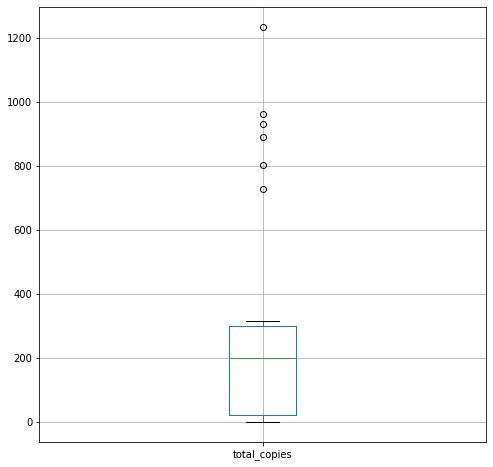

In [69]:
platforms_income.boxplot('total_copies', figsize=(8, 8));

Можно сказать, что из большинства платформ практически все меркнут по объёмам проданных копий на фоне платформ-гигантов - почти все попадают в межквартильный размах между 1-ым и 3-им квартилем, либо даже ещё ниже первого, а с 700+ проданных миллионов копий с заметным отрывом идут выборсы от линеек PS, XBOX и Wii

В рамках исследования выберем продажи по 10 платформам с наибольшим числом продаж копий

In [70]:
top_platforms = platforms_income.head(10)

In [71]:
display(top_platforms)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_copies
platform,,,,,,,,,,,,,,,,,,,,,
PS2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


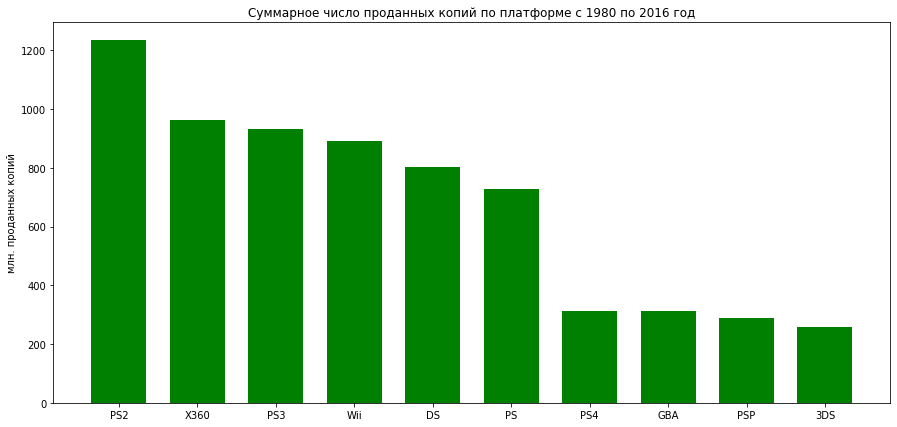

In [72]:
plt.figure(figsize=(15,7))
plt.bar(top_platforms.index, top_platforms['total_copies'], color='green', width=0.7)
plt.title('Суммарное число проданных копий по платформе с 1980 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

Посмотрим как для каждой отельной плафтормы по годам было распределено число проданных копий

In [73]:
del top_platforms['total_copies']

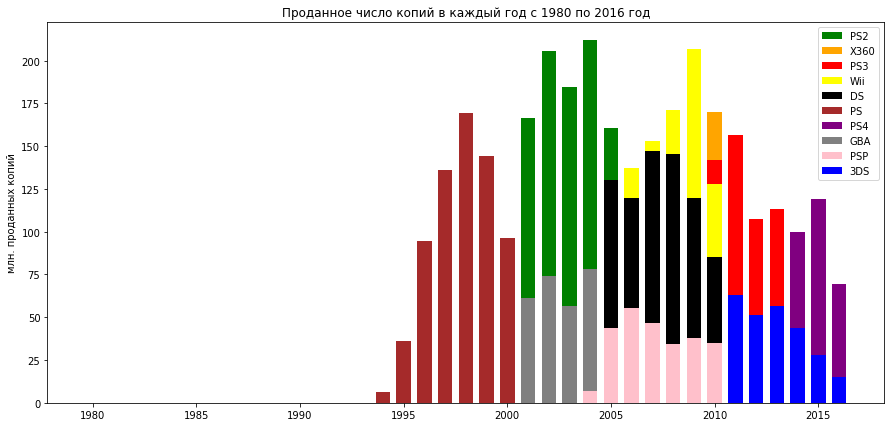

In [74]:
plt.figure(figsize=(15,7))
plt.bar(top_platforms.columns, top_platforms.loc['PS2'], color='green', width=0.7, label='PS2')
plt.bar(top_platforms.columns, top_platforms.loc['X360'], color='orange', width=0.7, label='X360')
plt.bar(top_platforms.columns, top_platforms.loc['PS3'], color='red', width=0.7, label='PS3')
plt.bar(top_platforms.columns, top_platforms.loc['Wii'], color='yellow', width=0.7, label='Wii')
plt.bar(top_platforms.columns, top_platforms.loc['DS'], color='black', width=0.7, label='DS')
plt.bar(top_platforms.columns, top_platforms.loc['PS'], color='brown', width=0.7, label='PS')
plt.bar(top_platforms.columns, top_platforms.loc['PS4'], color='purple', width=0.7, label='PS4')
plt.bar(top_platforms.columns, top_platforms.loc['GBA'], color='grey', width=0.7, label='GBA')
plt.bar(top_platforms.columns, top_platforms.loc['PSP'], color='pink', width=0.7, label='PSP')
plt.bar(top_platforms.columns, top_platforms.loc['3DS'], color='blue', width=0.7, label='3DS')
plt.legend(loc='upper right')
plt.title('Проданное число копий в каждый год с 1980 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

Как видно по цветам, закрепленным за каждой из платформ из топ-10 - средний срок жизни платформы - примерно 5 лет, после этого она плавно уходит с рынка, теряя в проданных копиях - в данном случае её цвет больше не выделяется из общей массы. Если говорить о линейке PlayStation, то можно сказать, что производитель, видимо понимая закономерности рынка, примерно каждые 5 лет выводит из оборота устаревающую платформу и сразу же спустя 5 лет после выхода первой вводит новую, запуская новый рост продаж игр для своей игровой станции

In [75]:
display(platforms_income)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_copies
platform,,,,,,,,,,,,,,,,,,,,,
PS2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


In [76]:
platforms = list(platforms_income.index)
dead_ones = []
for platform in platforms:
    if platforms_income.loc[platform, 2016] == 0:
        dead_ones.append(platform)

In [77]:
dead_ones

['PS2',
 'DS',
 'PS',
 'GBA',
 'PSP',
 'GB',
 'XB',
 'NES',
 'N64',
 'SNES',
 'GC',
 '2600',
 'SAT',
 'GEN',
 'DC',
 'SCD',
 'NG',
 'WS',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

Теперь есть те платформы, по которым резонно делать исследование. Для каждой из них посчитаем сколько лет они держались на рынке. Иными словами - ячейки в которых значение проданных копий игр в году было больше 0

In [78]:
lifetime = []
for platform in dead_ones:
    it_lived = 0
    for year in years:
        if platforms_income.loc[platform, year] != 0:
            it_lived += 1
    lifetime.append(it_lived)

In [79]:
lifetime

[12, 11, 10, 8, 12, 13, 9, 12, 7, 10, 7, 10, 6, 5, 7, 2, 4, 3, 1, 2, 1, 1]

Проверим данный вывод например для PS2, которая была первая в списке:

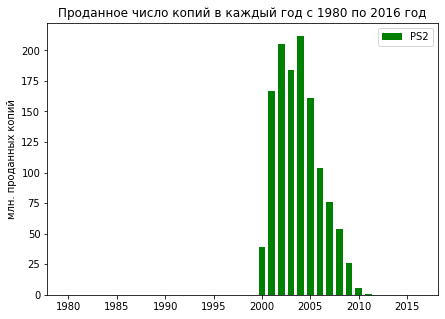

In [80]:
plt.figure(figsize=(7,5))
plt.bar(top_platforms.columns, top_platforms.loc['PS2'], color='green', width=0.7, label='PS2')
plt.legend(loc='upper right')
plt.title('Проданное число копий в каждый год с 1980 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

Видно, что данные правдоподобны - платформа прожила действительно чуть больше 10 лет и судя по ранее выведенному графику. Посчитаем среднее для полученного списка чисел и таким образом узнаем, как долго в среднем жили те платформы, которых уже больше нет на рынке

In [81]:
statistics.mean(lifetime)

6.954545454545454

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Работая с топ-10 платформ можно сказать, что из "ныне живущих" и учавствующих в формировании рынка самым заметным представителем платформ является PS4, продажи по которой начались в 2013 году. Будем это считать за начало "актуального периода" по которому стоит анализировать ситуацию для подготовки к 2017 году

In [82]:
current_period = data[data['year_of_release'] != 'не было релиза']

In [83]:
current_period = current_period.query('year_of_release >= 2013')

In [84]:
display(current_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01


In [85]:
current_platforms_income = current_period.pivot_table(index='platform', columns='year_of_release', 
                                                      values='total_sales', aggfunc='sum')
current_platforms_income

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


Если у платформы к 2016 году уже не было продаж, то можно сказать, что это уже не актуальная для анализа платформа

In [86]:
current_platforms_income = current_platforms_income.dropna(subset=[2016])

In [87]:
current_platforms_income = current_platforms_income.fillna(0)

In [88]:
display(current_platforms_income)

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60
X360,88.58,34.74,11.96,1.52
XOne,18.96,54.07,60.14,26.15


In [89]:
current_years = list(current_platforms_income.columns)

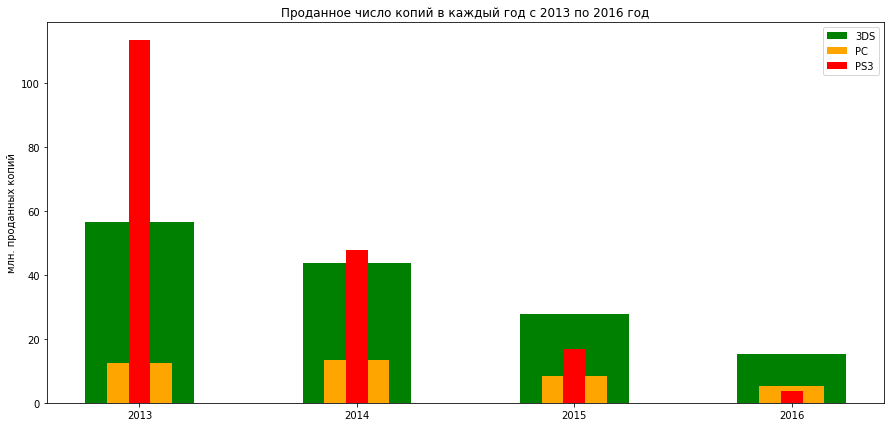

In [90]:
w = 0.3
plt.figure(figsize=(15,7))
plt.bar(current_years, current_platforms_income.loc['3DS'], color='green', width=w+0.2, label='3DS', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['PC'], color='orange', width=w, label='PC', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['PS3'], color='red', width=w-0.2, label='PS3', tick_label=current_years)
plt.legend(loc='upper right')
plt.title('Проданное число копий в каждый год с 2013 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

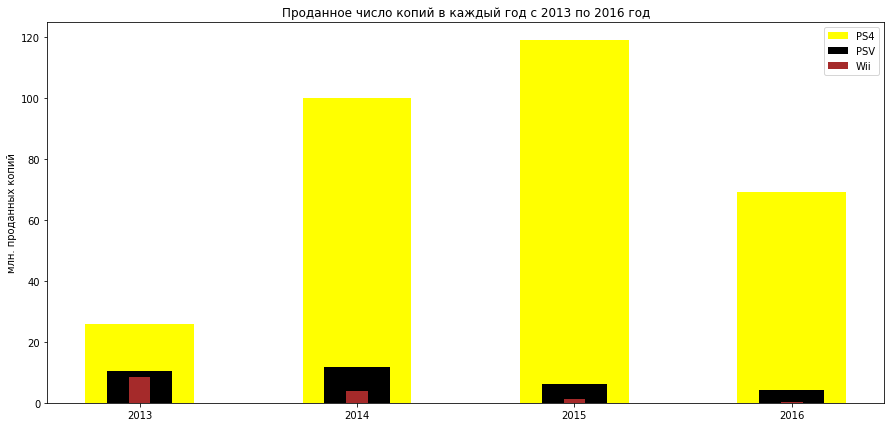

In [91]:
plt.figure(figsize=(15,7))
plt.bar(current_years, current_platforms_income.loc['PS4'], color='yellow', width=w+0.2, label='PS4', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['PSV'], color='black', width=w, label='PSV', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['Wii'], color='brown', width=w-0.2, label='Wii', tick_label=current_years)
plt.legend(loc='upper right')
plt.title('Проданное число копий в каждый год с 2013 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

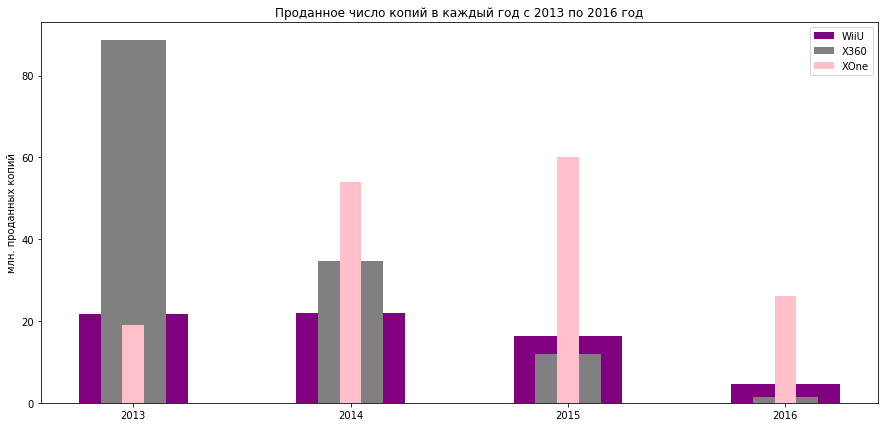

In [92]:
plt.figure(figsize=(15,7))
plt.bar(current_years, current_platforms_income.loc['WiiU'], color='purple', width=w+0.2, label='WiiU', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['X360'], color='grey', width=w, label='X360', tick_label=current_years)
plt.bar(current_years, current_platforms_income.loc['XOne'], color='pink', width=w-0.2, label='XOne', tick_label=current_years)
plt.legend(loc='upper right')
plt.title('Проданное число копий в каждый год с 2013 по 2016 год')
plt.ylabel('млн. проданных копий')
plt.show()

Для удобства просмотра разделил 9 оставшихся платформ для исследования на 3 случайные группы по 3 штуки. Как видно из общей тенденции - практически все платформы испытывают упадок продаж - возможно имеет место быть рост популярности мобильных игр, из-за чего все остальные стали сдавать свои позиции. Среди лидеров на 2016 год в любом случае можно назвать **XONE** , **3DS** и **PS4** - их продажи хоть и тоже падают вместе со всеми, но они так или иначе занимают самую большую долю продаж

In [93]:
current_platforms = list(current_platforms_income.index)

In [94]:
lifetime = []
for platform in current_platforms:
    it_lived = 0
    for year in years:
        if platforms_income.loc[platform, year] != 0:
            it_lived += 1
    lifetime.append(it_lived)

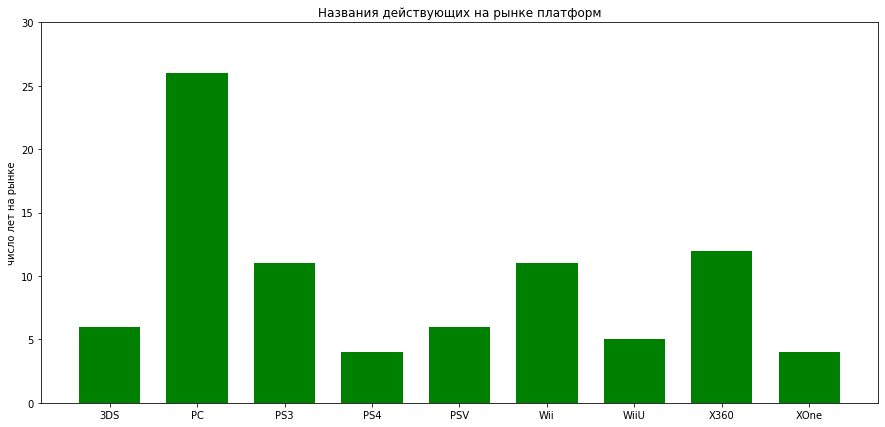

In [95]:
plt.figure(figsize=(15,7))
plt.bar(current_platforms, lifetime, color='green', width=0.7)
plt.title('Названия действующих на рынке платформ')
plt.ylabel('число лет на рынке')
plt.ylim(top=30)
plt.show()

Соответственно, те платформы, где нынешний срок существования на рынке больше ранее вычисленных 7 - скорее всего готовятся уходить в закат, и в такие платформы не стоит вкладываться. Исключение разве что это конечно же вечный PC, который по сути не является одной конретной платформой, а характеризует обновляющееся год за годом железо всё новых и новых компьютеров, за счёт чего и является своего рода бессмертной платформой.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве одной популярной платформы возьмем PS4. Выделим из исходного датафрейма только те строки, где были выпущены игры для этой платформы, а так же в которых выставлена оценка критиков и пользователей

In [96]:
data_playstation = current_period.query('platform == "PS4"')

In [97]:
data_playstation = data_playstation[data_playstation['critic_score'] != 'нет оценки критиков']

In [98]:
data_playstation = data_playstation[data_playstation['user_score'] != 'нет оценки пользователей']

In [99]:
display(data_playstation)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,fifa 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.60
105,fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,super dungeon bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16499,sherlock holmes: the devil's daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
16500,root letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,M,0.01
16526,dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


Оставим только столбцы, которые интересны для анализа

In [100]:
data_playstation = data_playstation[['critic_score', 'user_score', 'total_sales']]

Так как в исходном датафрейме в столбцах **critic_score** и **user_score** были строковые значения "нет оценки ...", то тип данных в этих столбцах был object. Переведём его в пригодный тип для расчёта корреляции

In [101]:
data_playstation['critic_score'] = data_playstation['critic_score'].astype('int')
data_playstation['user_score'] = data_playstation['user_score'].astype('float')

In [102]:
data_playstation.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Как видим, конкретно для PS4 продажи зависят в основном от оценки критиков - корреляция больше 0.4 - при этом от оценок пользователей продажи не зависят почти никак

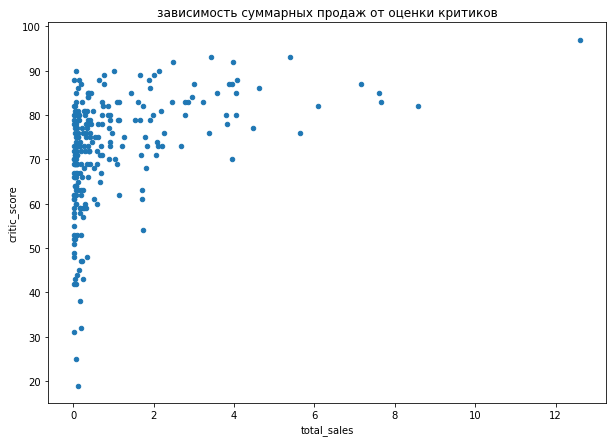

In [103]:
data_playstation.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(10,7))
plt.title('зависимость суммарных продаж от оценки критиков')
plt.show()

Как обсуждалось ранее - огромная часть проектов не переваливает даже за миллион продаж, скапливаясь в районе 0 на фоне остальных проектов - гигантов. Так что с очень малым числом продаж есть довольно большое число проектов фактически со всеми оценками - от очень низких до очень высоких. Но относительно высокую корреляцию в 0.4 в любом случае диаграмма рассеивания подтверждает - очень высокие продажи свойственны проектам с высокими оценками критиков - на диаграмме по сути нет проектов с большими продажами, но маленькой оценкой. Все проекты с более чем 3-4 млн проданных копий имели оценку критиков больше 70 баллов из 100

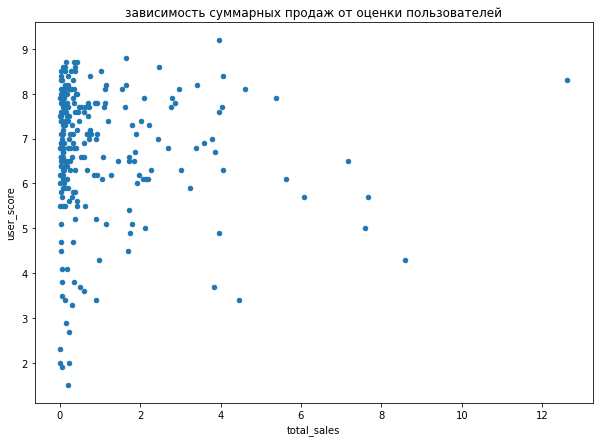

In [104]:
data_playstation.plot(x='total_sales', y='user_score', kind='scatter', figsize=(10,7))
plt.title('зависимость суммарных продаж от оценки пользователей')
plt.show()

А как раз в случае с оценкой пользователей можем заметить, что есть проекты, где их оценка весьма сильно расходилась с итоговыми продажами - есть проекты более чем с 3-4 млн копий, но имеющие оценки даже ниже 4 из 10. От таких несостыковок и низкая корреляция между данными столбцами

### Соотнесите выводы с продажами игр на других платформах

Предлагаю провести исследование корреляции оценок критиков и пользователей с продажами аналогично выше сделанному, но уже не только для PS4, а для всего датафрейма, где у игры есть оценка от пользователей и критиков. И затем сравнить как работает эта зависимость для платформы-гиганта в сравнении с общими тенденциями

In [105]:
data_critics = current_period[['critic_score', 'user_score', 'total_sales']]

In [106]:
display(data_critics)

,critic_score,user_score,total_sales
16,97,8.2,21.05
23,97,8.1,16.27
31,нет оценки критиков,нет оценки пользователей,14.63
33,нет оценки критиков,нет оценки пользователей,14.60
42,97,8.3,12.62
...,...,...,...
16703,нет оценки критиков,нет оценки пользователей,0.01
16707,нет оценки критиков,нет оценки пользователей,0.01
16710,нет оценки критиков,нет оценки пользователей,0.01
16712,нет оценки критиков,нет оценки пользователей,0.01


In [107]:
data_critics = data_critics[data_critics['critic_score'] != 'нет оценки критиков']
data_critics = data_critics[data_critics['user_score'] != 'нет оценки пользователей']
data_critics['critic_score'] = data_critics['critic_score'].astype('int')
data_critics['user_score'] = data_critics['user_score'].astype('float')

In [108]:
display(data_critics)

,critic_score,user_score,total_sales
16,97,8.2,21.05
23,97,8.1,16.27
42,97,8.3,12.62
60,73,2.6,10.24
69,71,2.6,9.36
...,...,...,...
16597,65,6.0,0.01
16630,63,8.2,0.01
16652,81,8.5,0.01
16660,74,6.7,0.01


In [109]:
data_critics.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.311692
user_score,0.502221,1.000000,-0.004064
total_sales,0.311692,-0.004064,1.000000


Можно сказать, что глобально общие тенденции весьма схожие - суммарные продажи, пусть и послабее, но точно так же как для отдельно взятой PS4 зависят в основном от оценок критиков, и разве что совсем немного коррелируют с оценками пользователей.

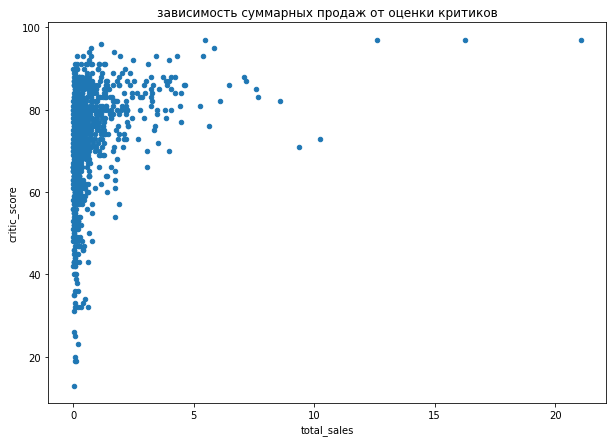

In [110]:
data_critics.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(10,7))
plt.title('зависимость суммарных продаж от оценки критиков')
plt.show()

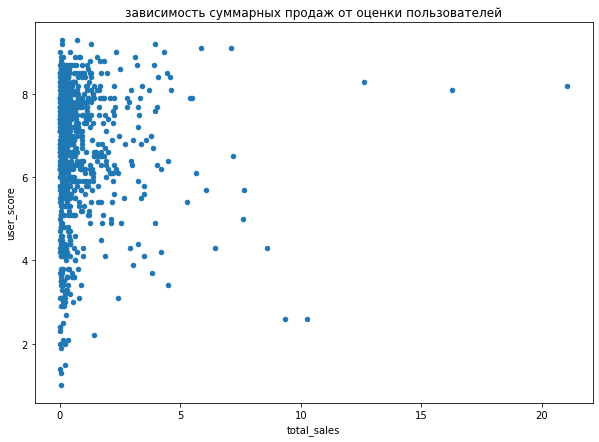

In [111]:
data_critics.plot(x='total_sales', y='user_score', kind='scatter', figsize=(10,7))
plt.title('зависимость суммарных продаж от оценки пользователей')
plt.show()

Как видно, у "выстреливших" проектов действительно вероятнее всего будет и достаточно высокая оценка от критиков и пользователей, но это не всегда обязательно, особенно если говорить об оценке пользователей. Что касается проектов, которые не собрали особо большого числа проданных копий, то у них фактически вообще могла быть любая оценка. То есть проецируя на реальну жизнь: есть масса хороших игр, которые понравились критикам, но кроме них про эти игры толком никто не узнал из-за малой известности студии или слабой пиар-компании, и особо много копий по миру их и не продали

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [112]:
display(current_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01


In [113]:
current_period = current_period.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

In [114]:
current_period['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

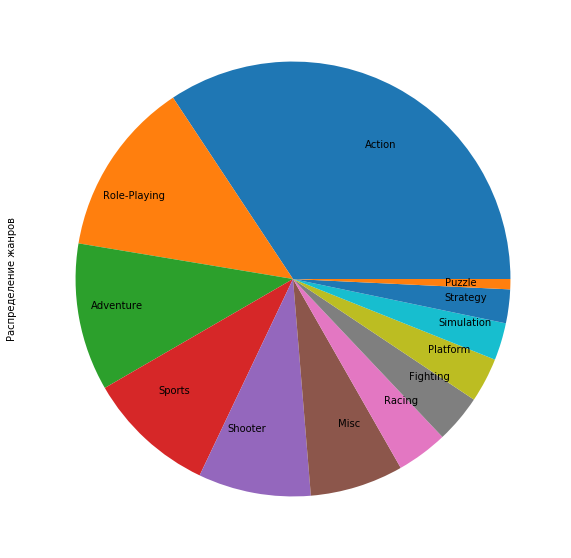

In [115]:
current_period['genre'].value_counts().plot(kind='pie', figsize=(20,10), labeldistance=0.7, label='Распределение жанров')
plt.show()

Попробуем по столбчатой диаграмме визуально оценить, на какой строке заканчиваются "богатые" на продажи проекты

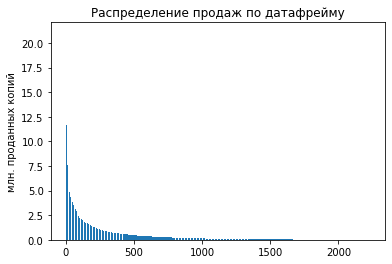

In [116]:
plt.bar(current_period.index, current_period['total_sales'])
plt.title('Распределение продаж по датафрейму')
plt.ylabel('млн. проданных копий')
plt.show()

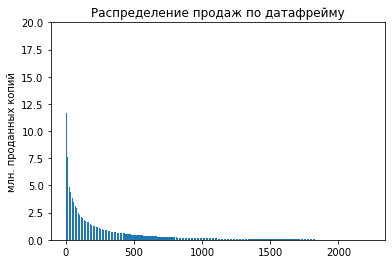

In [117]:
plt.bar(current_period.index, current_period['total_sales'])
plt.title('Распределение продаж по датафрейму')
plt.ylabel('млн. проданных копий')
plt.ylim(top=20)
plt.show()

Какого-то очень резкого падения в проданных копиях нельзя наблюдать, но примерно предлагаю выделить первые 500 строк - пусть это будут данные о самых прибыльных играх

In [118]:
data_top_games = current_period.loc[:500, ['genre', 'total_sales']]

In [119]:
display(data_top_games)

,genre,total_sales
0,Action,21.05
1,Action,16.27
2,Shooter,14.63
3,Role-Playing,14.60
4,Action,12.62
...,...,...
496,Sports,0.46
497,Adventure,0.46
498,Action,0.46
499,Action,0.46


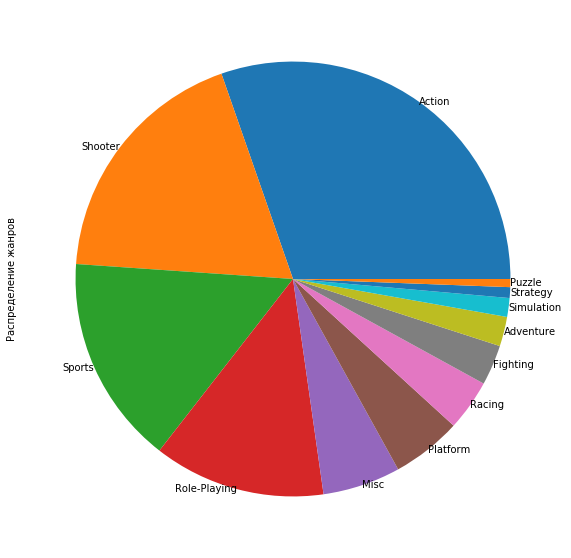

In [120]:
data_top_games['genre'].value_counts().plot(kind='pie', figsize=(20,10), labeldistance=1, label='Распределение жанров')
plt.show()

In [121]:
data_top_games['genre'].value_counts()

Action          152
Shooter          93
Sports           78
Role-Playing     64
Misc             29
Platform         26
Racing           19
Fighting         15
Adventure        11
Simulation        7
Strategy          4
Puzzle            3
Name: genre, dtype: int64

Можем сказать, что больше 50 % самых популярных игр были жанров **Action** , **Shooter**, **Sports**

В исследовании так же просят рассмотреть жанры с низкими продажами и сравнить их с самыми популярными жанрами - сделаем это в виде среза с конца отсортированного по прибыли датафрейма и проведём аналогичные исследования

In [122]:
current_period.shape

(2233, 12)

In [123]:
less_popular_games_index = current_period.shape[0] - 500

In [124]:
data_less_popular_games = current_period.loc[less_popular_games_index:, ['genre', 'total_sales']]

In [125]:
display(data_less_popular_games)

,genre,total_sales
1733,Adventure,0.03
1734,Action,0.03
1735,Racing,0.03
1736,Adventure,0.03
1737,Action,0.03
...,...,...
2228,Action,0.01
2229,Adventure,0.01
2230,Action,0.01
2231,Adventure,0.01


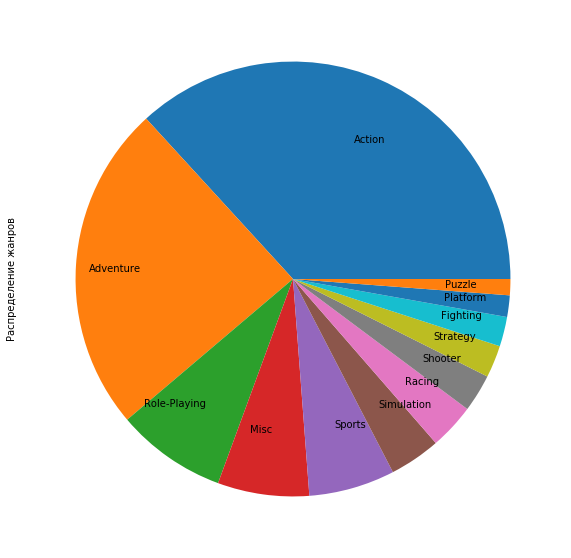

In [126]:
data_less_popular_games['genre'].value_counts().plot(kind='pie', figsize=(20,10), labeldistance=0.7, label='Распределение жанров')
plt.show()

In [127]:
data_less_popular_games['genre'].value_counts()

Action          184
Adventure       122
Role-Playing     41
Misc             34
Sports           32
Simulation       19
Racing           17
Shooter          14
Strategy         12
Fighting         11
Platform          8
Puzzle            6
Name: genre, dtype: int64

Больше 50 % наименее распроданных игр - это опять же игры жанра **Action** (видимо на него в принципе была общая тенденция делать игры, и в общей совокупности нашлось много как выстрелевших, так и провалившихся, поэтому этот жанр фактически распределён по всему датафрейму равномерно) , **Adventure** и **Role-Playing** 

##  Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [128]:
data_regions = data.copy(deep=True)

In [129]:
data_na = data_regions.copy(deep=True)
data_eu = data_regions.copy(deep=True)
data_jp = data_regions.copy(deep=True)

In [130]:
data_na = data_na[['platform', 'genre', 'rating', 'na_sales']]
data_eu = data_eu[['platform', 'genre', 'rating', 'eu_sales']]
data_jp = data_jp[['platform', 'genre', 'rating', 'jp_sales']]

In [131]:
data_na = data_na.sort_values(by='na_sales', ascending=False)
data_eu = data_eu.sort_values(by='eu_sales', ascending=False)
data_jp = data_jp.sort_values(by='jp_sales', ascending=False)

In [132]:
display(data_na)

,platform,genre,rating,na_sales
0,Wii,Sports,E,41.36
1,NES,Platform,рейтинга нет,29.08
9,NES,Shooter,рейтинга нет,26.93
5,GB,Puzzle,рейтинга нет,23.20
2,Wii,Racing,E,15.68
...,...,...,...,...
11730,PS2,Role-Playing,рейтинга нет,0.00
11729,DS,Fighting,рейтинга нет,0.00
11718,PSP,Fighting,рейтинга нет,0.00
11715,PC,Racing,E,0.00


In [133]:
display(data_eu)

,platform,genre,rating,eu_sales
0,Wii,Sports,E,28.96
2,Wii,Racing,E,12.76
10,DS,Simulation,рейтинга нет,10.95
3,Wii,Sports,E,10.93
19,DS,Misc,E,9.20
...,...,...,...,...
11018,Wii,Shooter,E10+,0.00
2715,DS,Misc,рейтинга нет,0.00
11016,PSP,Fighting,T,0.00
11013,PSP,Role-Playing,T,0.00


In [134]:
display(data_jp)

,platform,genre,rating,jp_sales
4,GB,Role-Playing,рейтинга нет,10.22
12,GB,Role-Playing,рейтинга нет,7.20
1,NES,Platform,рейтинга нет,6.81
6,DS,Platform,E,6.50
20,DS,Role-Playing,рейтинга нет,6.04
...,...,...,...,...
9542,PC,Strategy,T,0.00
4462,PS3,Misc,T,0.00
4460,PS2,Action,E,0.00
4459,PS2,Sports,E,0.00


По получившимся датафреймам должно быть вполне удобно сделать требуемые исследования. Для начала проведём анализ по тому, какие платформы можно выделить в топ-5 в каждом регионе. Предлагаю это сделать по признаку проданных копий игр на эту плафторму в регионе. А далее сравнить какую долю от рынка заняла каждая из этих платформ

In [135]:
platforms_sales_na = data_na.pivot_table(index='platform', 
                                         values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [136]:
platforms_sales_na

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40
PS,336.52
GBA,187.54
XB,186.69
N64,139.02


Добавим столбец, который показывает долю проданных копий на плафторму от общего рынка

In [137]:
all_sales_na = platforms_sales_na['na_sales'].sum()

In [138]:
platforms_sales_na['sales_percent'] = (platforms_sales_na['na_sales']/all_sales_na)*100

In [139]:
platforms_sales_na

,na_sales,sales_percent
platform,,
X360,602.47,13.685191
PS2,583.84,13.262008
Wii,496.90,11.287153
PS3,393.49,8.938181
DS,382.40,8.686270
PS,336.52,7.644099
GBA,187.54,4.259998
XB,186.69,4.240690
N64,139.02,3.157859


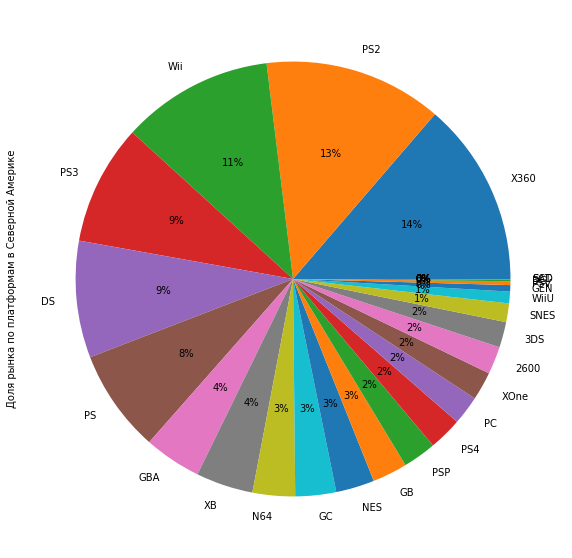

In [140]:
platforms_sales_na['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по платформам в Северной Америке', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Собственно, на данной круговой диаграмме можно увидеть все необходимые данные - топ-5 самых популярных по продажам платформ и посмотреть какую долю от общих продаж по региону они заняли. Предлагаю провести аналогичные исследования для остальных регионов

In [141]:
platforms_sales_eu = data_eu.pivot_table(index='platform', 
                                         values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [142]:
all_sales_eu = platforms_sales_eu['eu_sales'].sum()

In [143]:
platforms_sales_eu['sales_percent'] = (platforms_sales_eu['eu_sales']/all_sales_eu)*100

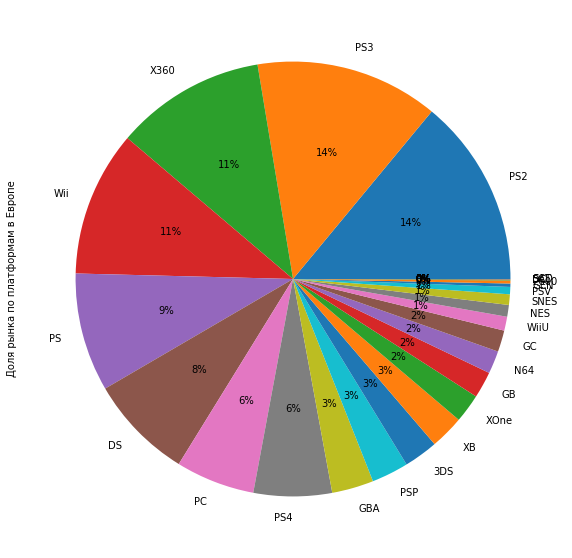

In [144]:
platforms_sales_eu['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по платформам в Европе', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Как видно, топы фактически совпадают - почти в обоих регионах это PlayStation, XBox и Wii

In [145]:
platforms_sales_jp = data_jp.pivot_table(index='platform', 
                                         values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [146]:
all_sales_jp = platforms_sales_jp['jp_sales'].sum()

In [147]:
platforms_sales_jp['sales_percent'] = (platforms_sales_jp['jp_sales']/all_sales_jp)*100

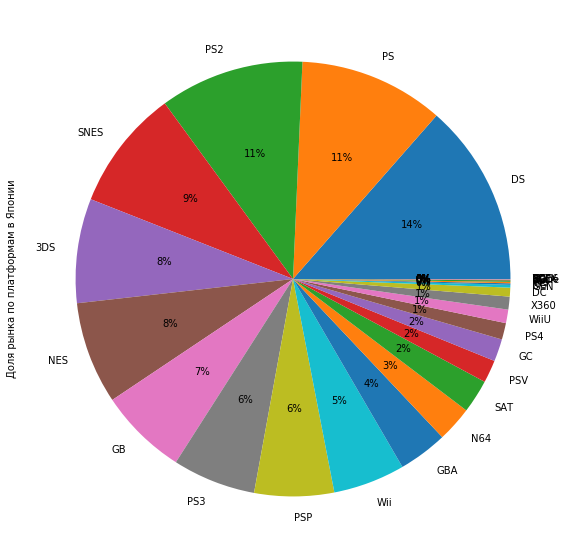

In [148]:
platforms_sales_jp['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по платформам в Японии', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

В Японии топ действительно изменился - XBox и Wii вообще оказались непопулярны - хоть в топе и остались PS2 и PS, но в остальном топ вытеснен платформами DS, SNES и NES, которые в топах по другим регионам замечены не были

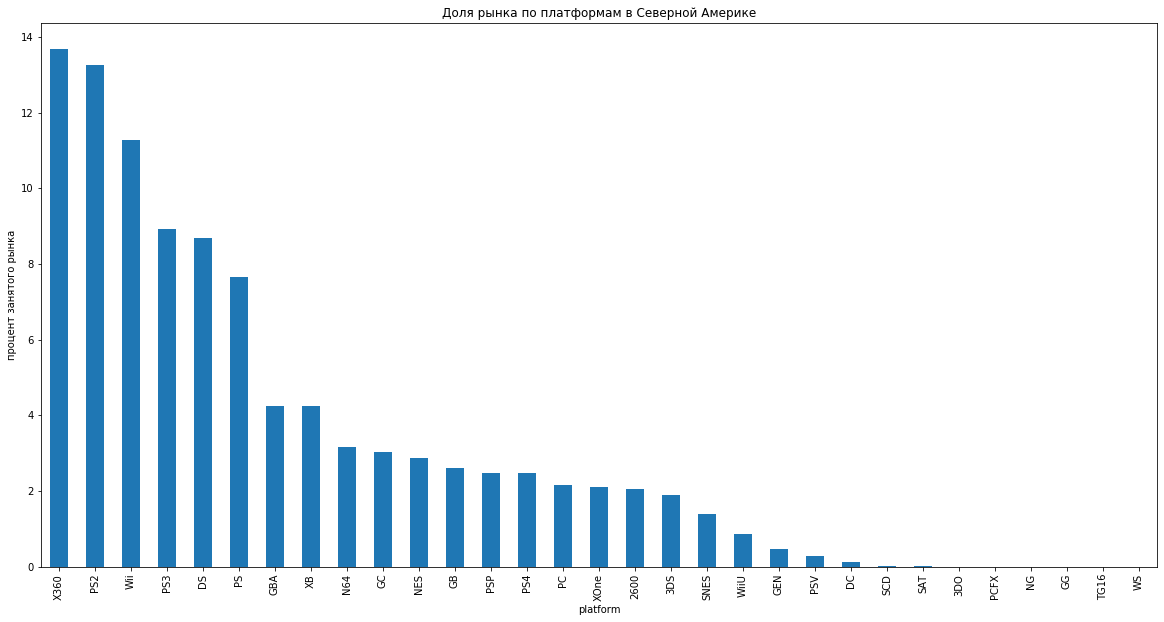

In [149]:
platforms_sales_na['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по платформам в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

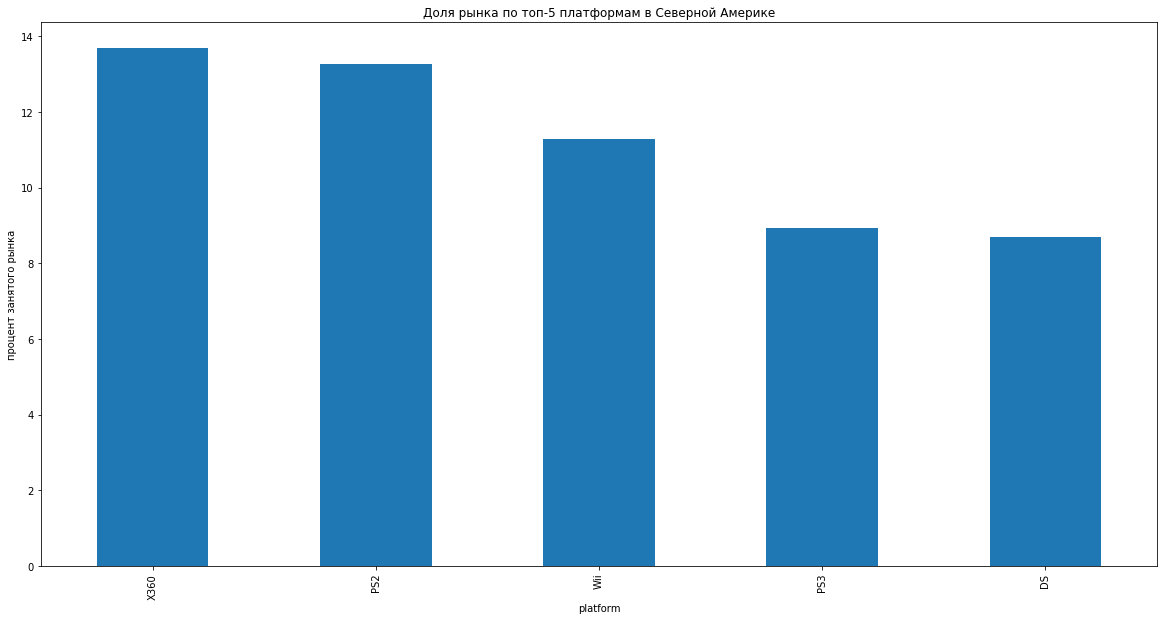

In [150]:
platforms_sales_na['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 платформам в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

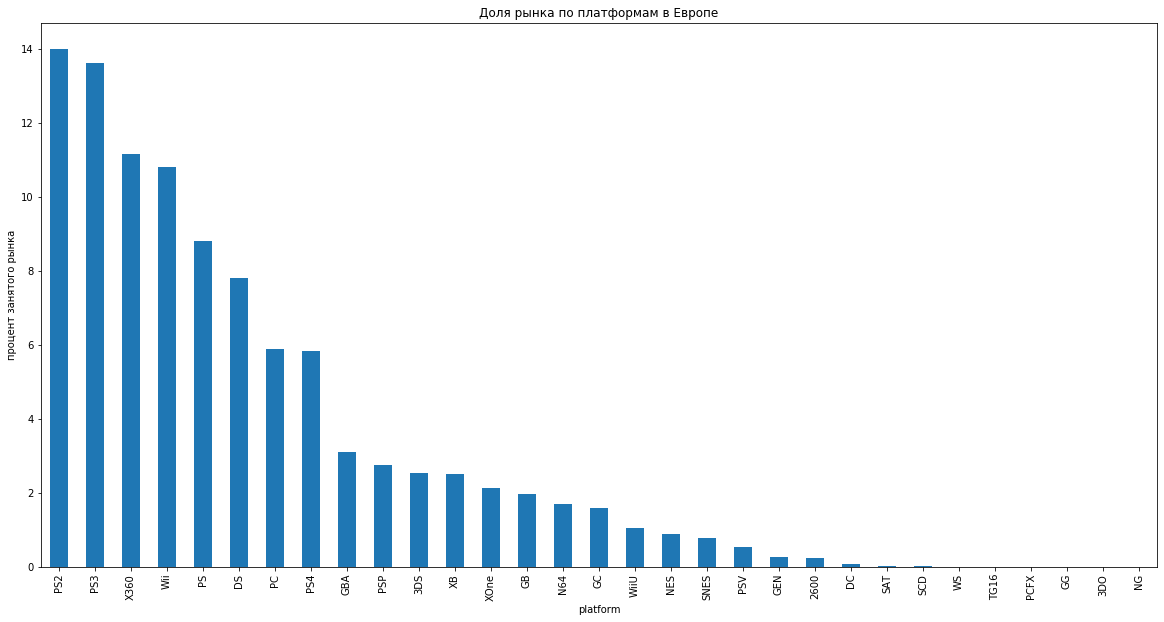

In [151]:
platforms_sales_eu['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по платформам в Европе')
plt.ylabel('процент занятого рынка')
plt.show()

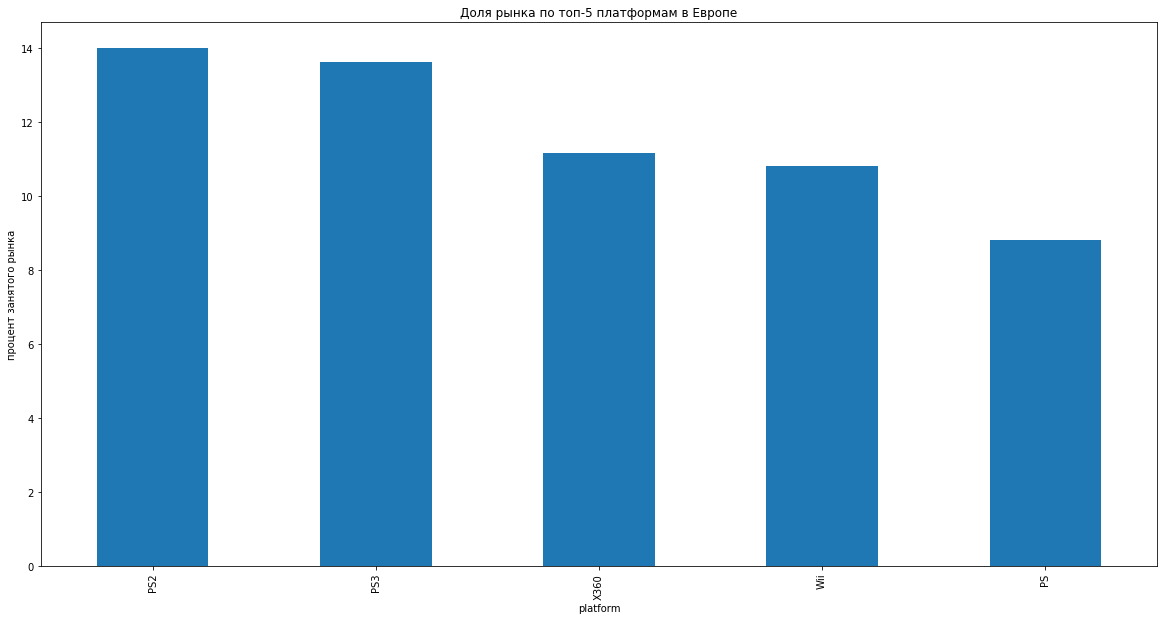

In [152]:
platforms_sales_eu['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 платформам в Европе')
plt.ylabel('процент занятого рынка')
plt.show()

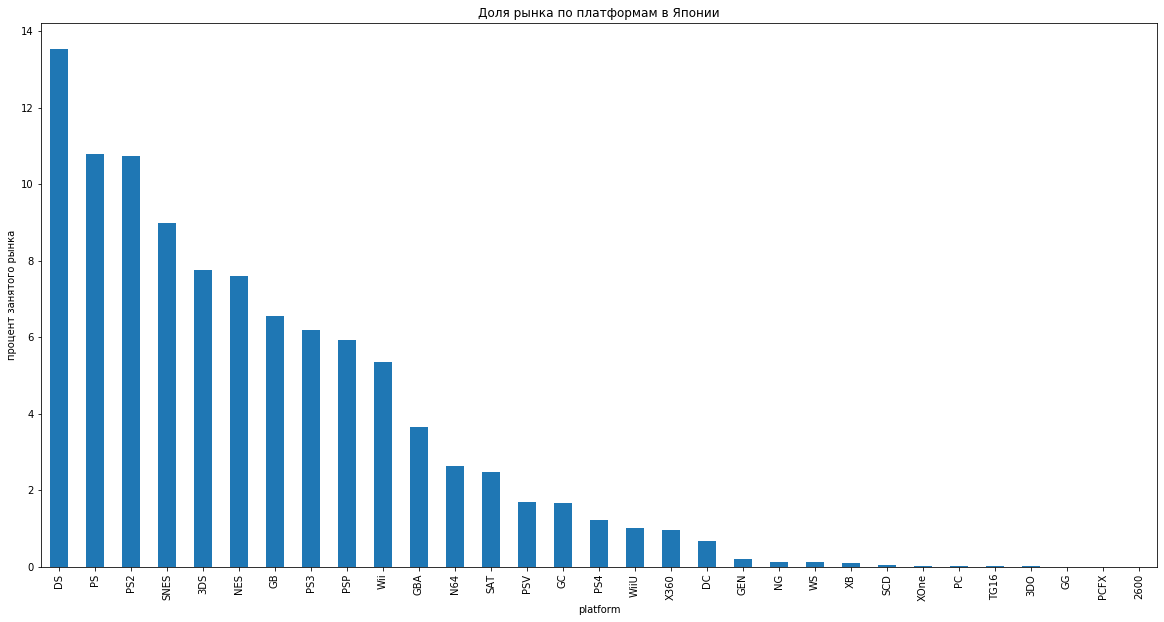

In [153]:
platforms_sales_jp['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по платформам в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

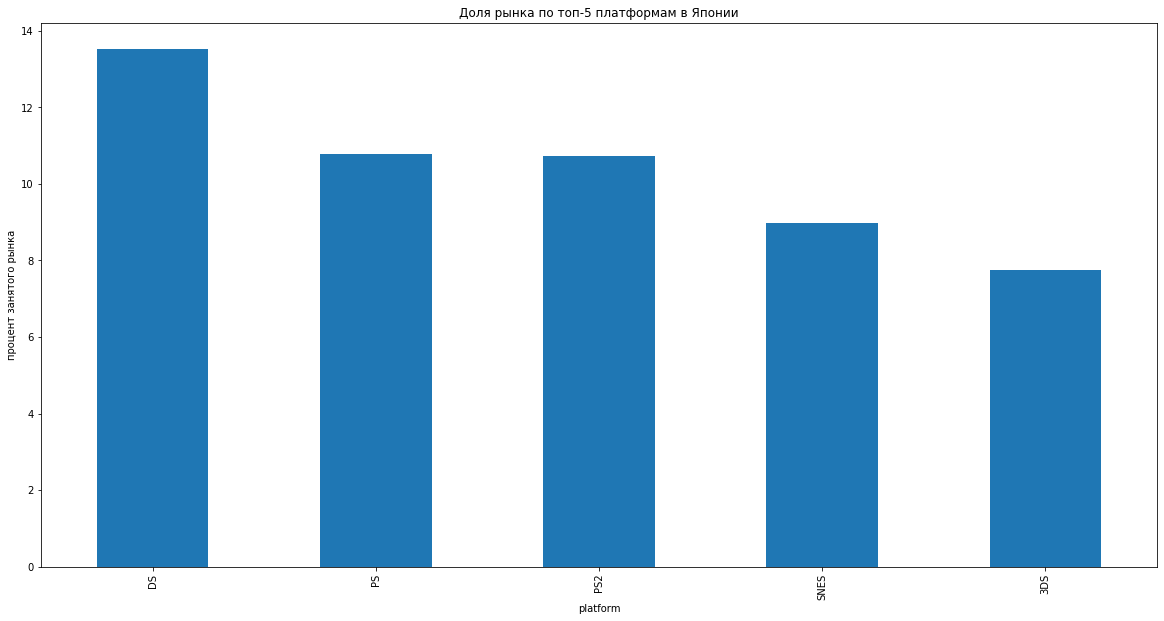

In [154]:
platforms_sales_jp['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 платформам в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

### Самые популярные жанры (топ-5). Поясните разницу.

В принципе, по алгоритму это исследование ничем не отличается от предыдущего. Просто вместо платформы будем работать с жанром

In [155]:
genre_sales_na = data_na.pivot_table(index='genre', 
                                         values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [156]:
genre_sales_na

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27
Racing,359.35
Role-Playing,330.81
Fighting,223.36
Simulation,181.92


In [157]:
genre_sales_na['sales_percent'] = (genre_sales_na['na_sales']/all_sales_na)*100

In [158]:
genre_sales_na

,na_sales,sales_percent
genre,,
Action,879.01,19.966836
Sports,684.43,15.546924
Shooter,592.24,13.452815
Platform,445.50,10.119595
Misc,407.27,9.251195
Racing,359.35,8.162686
Role-Playing,330.81,7.514396
Fighting,223.36,5.073654
Simulation,181.92,4.132338


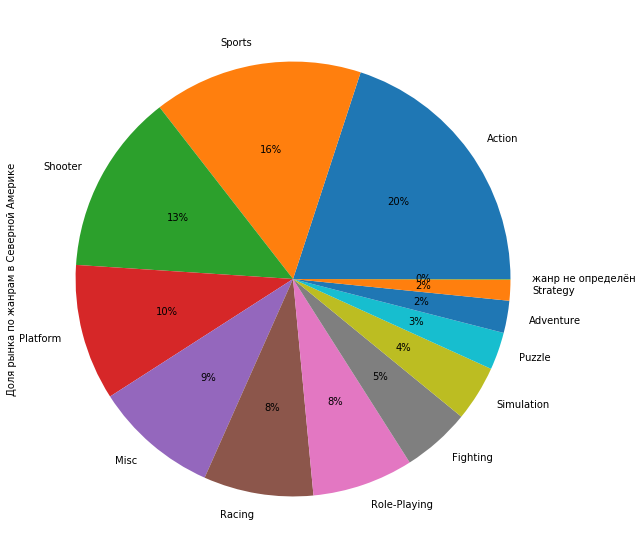

In [159]:
genre_sales_na['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по жанрам в Северной Америке', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Самые популярные - Action, Sports и Shooter. Меньшую, но всё же достаточную для попадания в топ-5 долю занимают игры жанра Platform и Misc

In [160]:
genre_sales_eu = data_eu.pivot_table(index='genre', 
                                         values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [161]:
genre_sales_eu['sales_percent'] = (genre_sales_eu['eu_sales']/all_sales_eu)*100

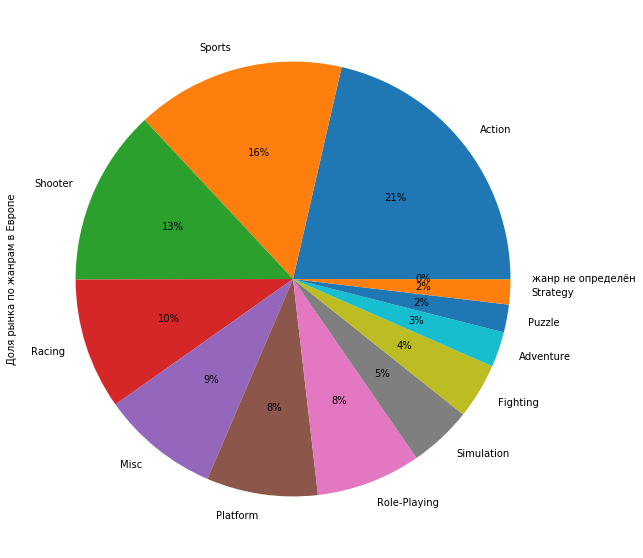

In [162]:
genre_sales_eu['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по жанрам в Европе', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Здесь в топ добавились гоночные игры жанра Racing, вытеснив Misc, однако тот тоже остался недалеко от топ-5. В общем, как и в ситуации с самыми популярными платформами - можно сказать что Европа и Америка имеют вполне одинаковые предпочтения и там выстреливают одни и те же продукты. И наоборот наверняка и с жанрами игр в Японии сейчас окажется несколько другая картинка

In [163]:
genre_sales_jp = data_jp.pivot_table(index='genre', 
                                         values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [164]:
genre_sales_jp['sales_percent'] = (genre_sales_jp['jp_sales']/all_sales_jp)*100

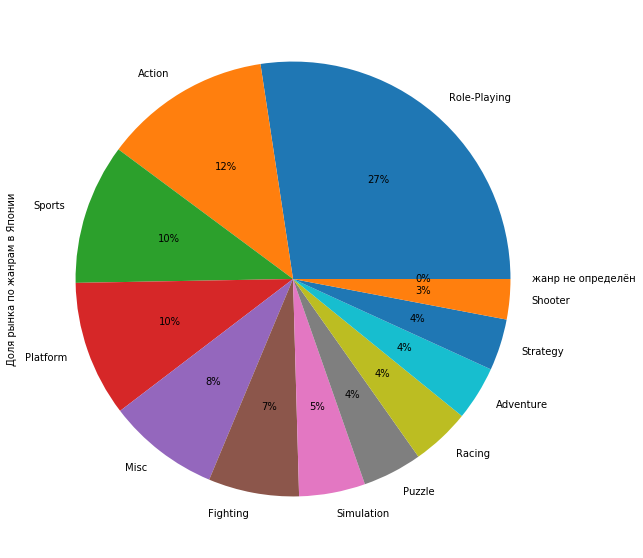

In [165]:
genre_sales_jp['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по жанрам в Японии', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Сильно сам список игр из топа не изменился, но естественно можно заметить, что на первое место вырвались игры жанра Role-Playing - в Америке и Евпропе они вообще даже близко не подбирались к топу, а в Японии это однознаный топ-1 жанр

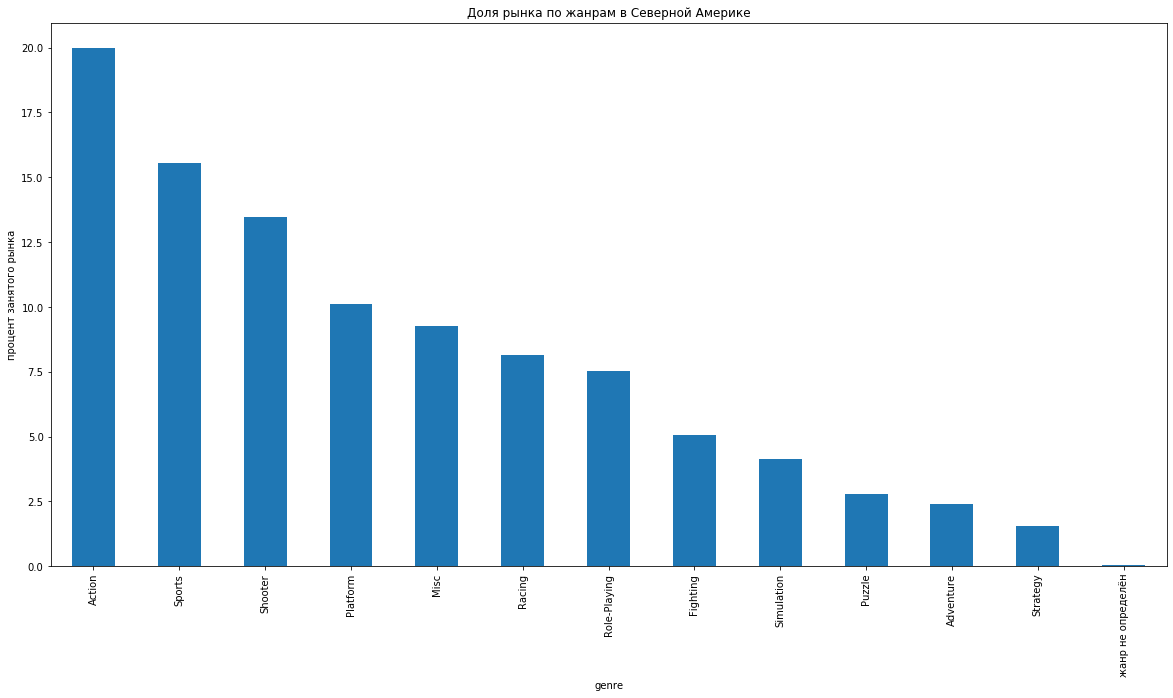

In [166]:
genre_sales_na['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по жанрам в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

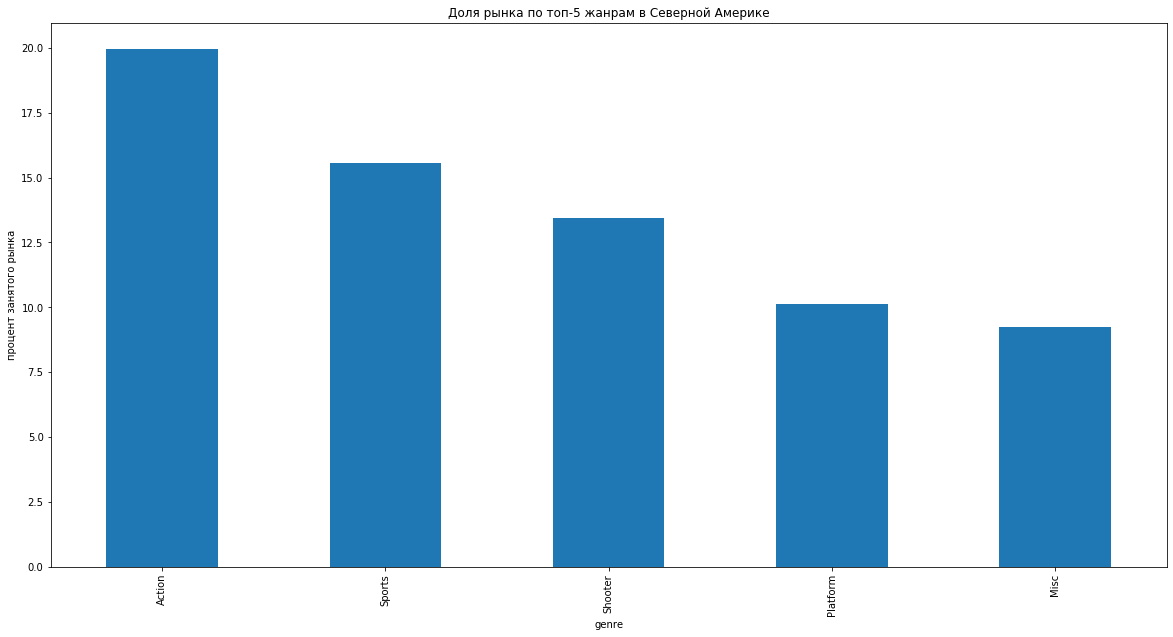

In [167]:
genre_sales_na['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 жанрам в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

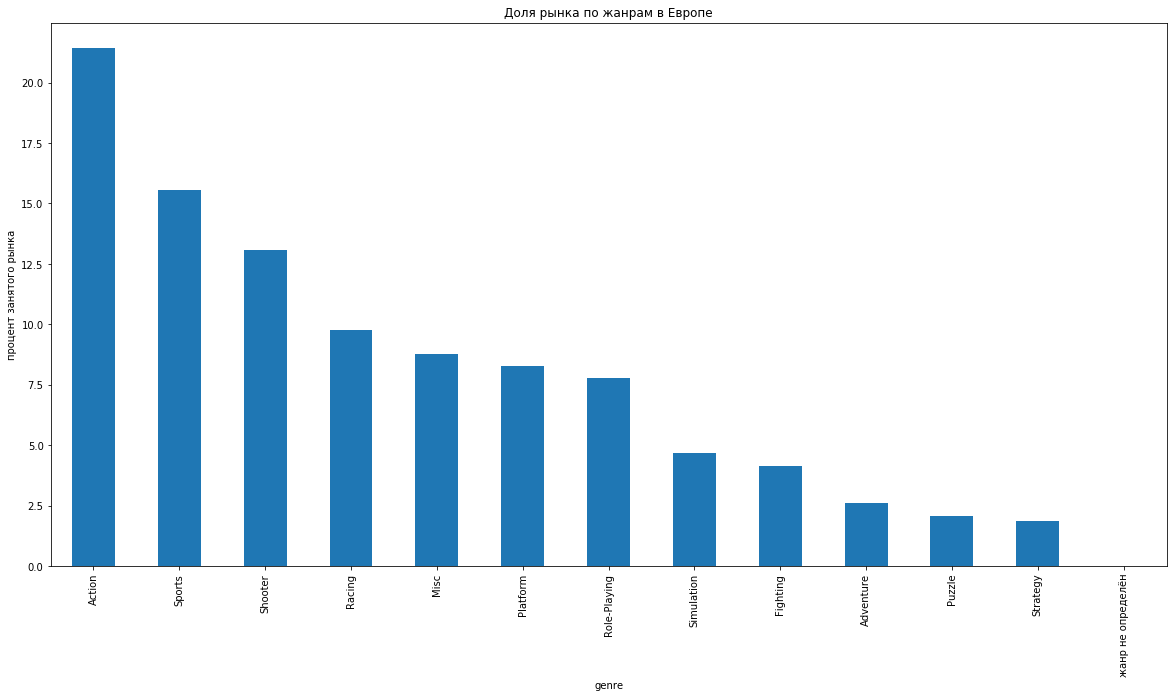

In [168]:
genre_sales_eu['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по жанрам в Европе')
plt.ylabel('процент занятого рынка')
plt.show()

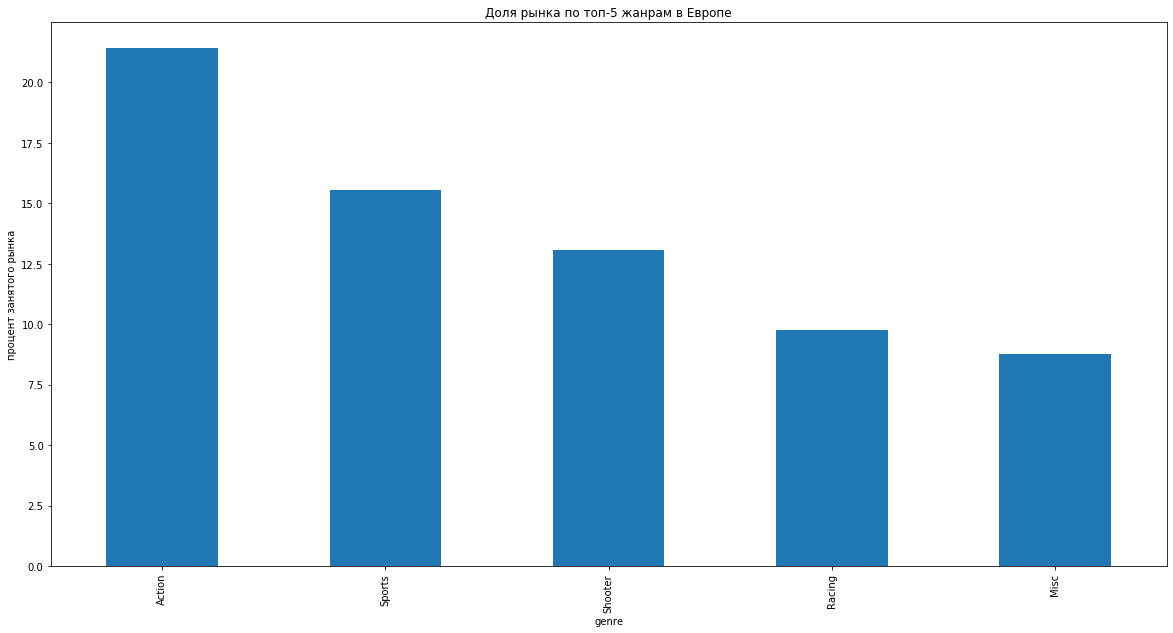

In [169]:
genre_sales_eu['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 жанрам в Европе')
plt.ylabel('процент занятого рынка')
plt.show()

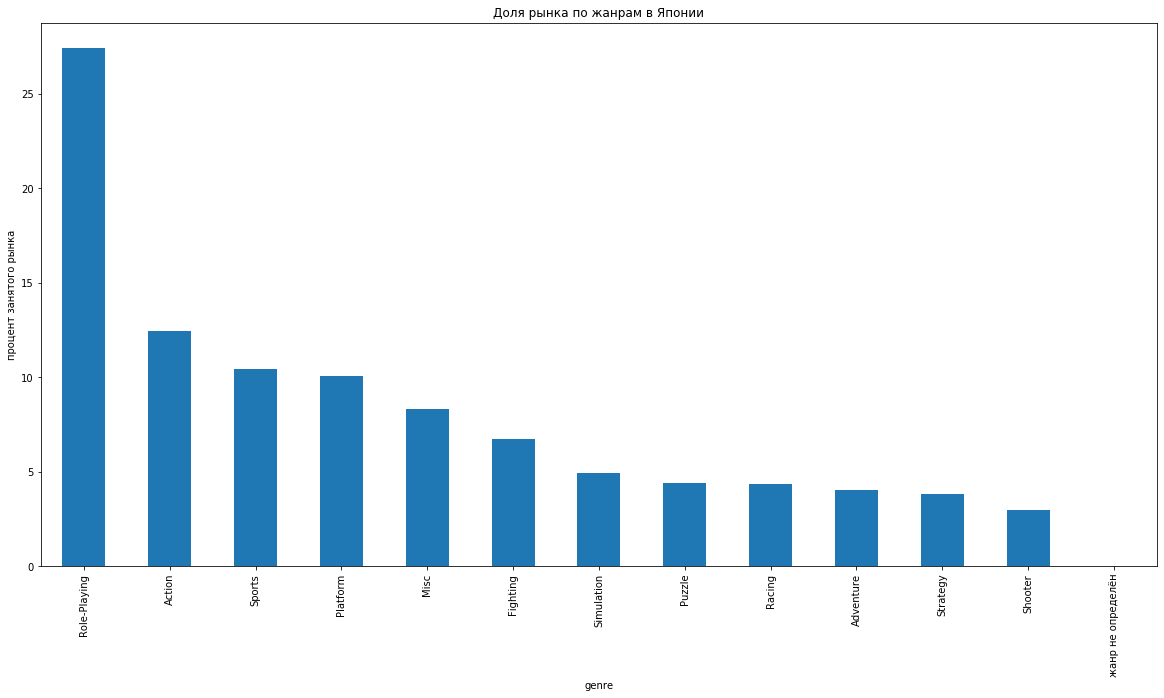

In [170]:
genre_sales_jp['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по жанрам в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

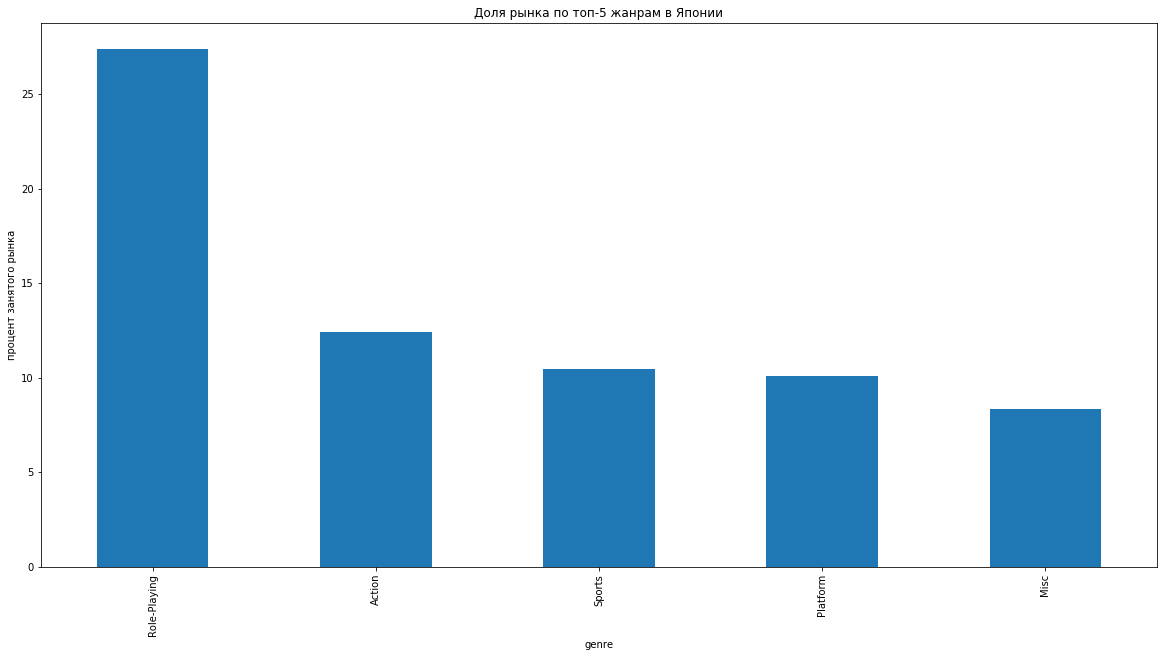

In [171]:
genre_sales_jp['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 жанрам в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

И посденее исследование насчёт влияния рейтинга ESRB на продажи в регионе - я бы предложил провести точно так же, так как алгоритм выглядит вполне наглядно отражающим картину. Игры с каким возрастным рейтингом какую долю рынка занимают, такова и характеристика их влияния на продажи. Мы увидим что игры с каим-то жанром в определенных регионах продаются плохо, а в каких-то наоборот такой возрастной рейтинг будет иметь большинство прибыльных проектов.

Проблема в том, что многие строки в исходном датафрейме не имели рейтинга, так что для того чтобы в исследовании учавствовали только игры, по которым можно судить о влиянии рейтинга на продажу - удалим для начала те строки, которые нам в исследовании не помогут.

In [172]:
data_na = data_na.query('rating != "рейтинга нет"')

In [173]:
data_eu = data_eu.query('rating != "рейтинга нет"')

In [174]:
data_jp = data_jp.query('rating != "рейтинга нет"')

In [175]:
rating_sales_na = data_na.pivot_table(index='rating', 
                                         values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [176]:
all_sales_na = rating_sales_na['na_sales'].sum()

In [177]:
rating_sales_na['sales_percent'] = (rating_sales_na['na_sales']/all_sales_na)*100

In [178]:
rating_sales_na

,na_sales,sales_percent
rating,,
E,1431.80,43.810450
T,754.98,23.101001
M,714.39,21.859022
E10+,351.84,10.765658
AO,10.77,0.329542
K-A,2.33,0.071294
EC,2.04,0.062420
RP,0.02,0.000612


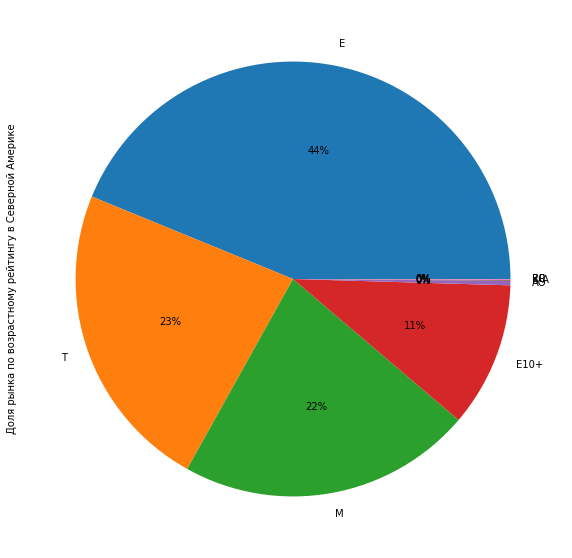

In [179]:
rating_sales_na['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по возрастному рейтингу в Северной Америке', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Большитсво игр, составляющих общее кол-во проданных на рынке копий - имеют рейтинг E (что-то вроде игр "для всех" с возрастным ограничением 6+). И далее примерно такую же долю рынка, но уже лишь суммарно - занимают игры с рейтингом T (игры для подростковой аудитории) и игры с рейтингом M (проекты уже для взрослой аудитории). В любом случае можно сказать, что игра с рейтингом "для всех" скорее всего войдет в список выстрелевших игр, принесших наибольшее число проданных копий, так как банально покрывает большую аудиторию. А вот игры где уже будет иметь место ограничение по возрасту, уже принесут заметно меньше - аж примерно в 2 раза 

In [180]:
rating_sales_eu = data_eu.pivot_table(index='rating', 
                                         values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [181]:
all_sales_eu = rating_sales_eu['eu_sales'].sum()

In [182]:
rating_sales_eu['sales_percent'] = (rating_sales_eu['eu_sales']/all_sales_eu)*100

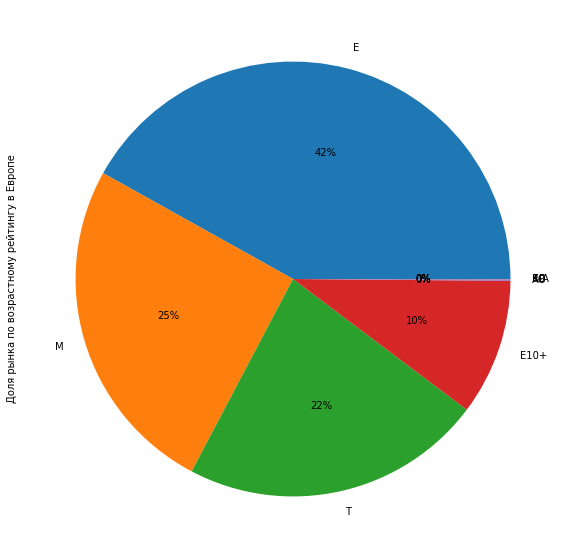

In [183]:
rating_sales_eu['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по возрастному рейтингу в Европе', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Как и ожидалось - картина в Европе примерно та же, что и в США

In [184]:
rating_sales_jp = data_jp.pivot_table(index='rating', 
                                         values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [185]:
all_sales_jp = rating_sales_jp['jp_sales'].sum()

In [186]:
rating_sales_jp['sales_percent'] = (rating_sales_jp['jp_sales']/all_sales_jp)*100

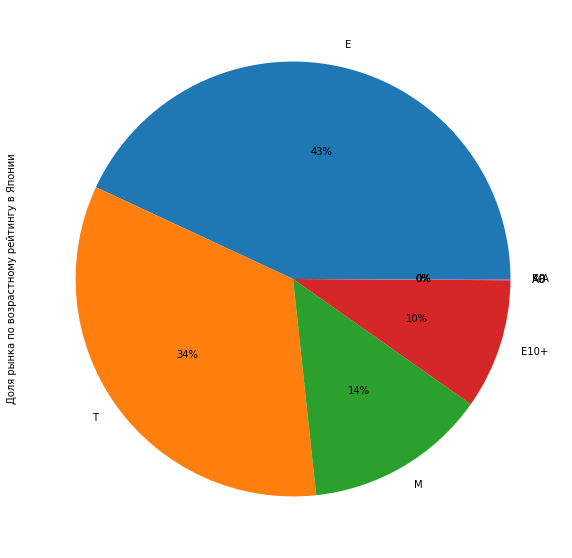

In [187]:
rating_sales_jp['sales_percent'].plot(kind='pie', 
                                         label='Доля рынка по возрастному рейтингу в Японии', 
                                         figsize=(20,10),
                                        autopct='%1.0f%%')
plt.show()

Топ существенно не сместился, так как и самих по себе рейтингов не так уж много, но в любом случае можно заметить, что в Японии игры с рейтингом T заметно популярнее игр с рейтингом M, хотя в Европе и Америке они были почти одинаковые

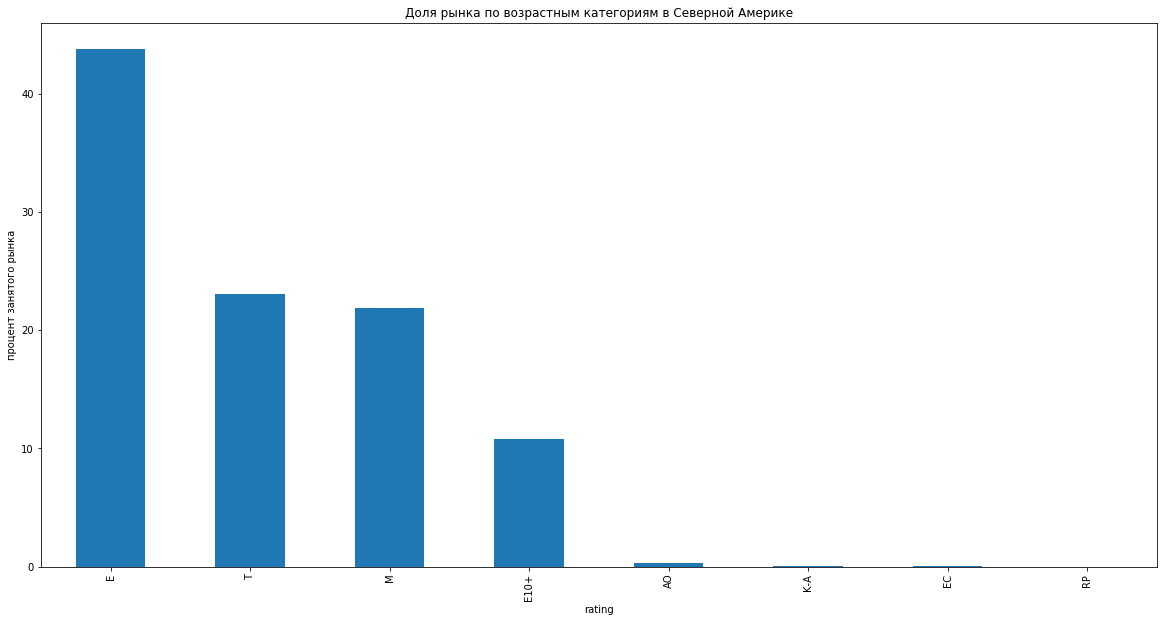

In [188]:
rating_sales_na['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по возрастным категориям в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

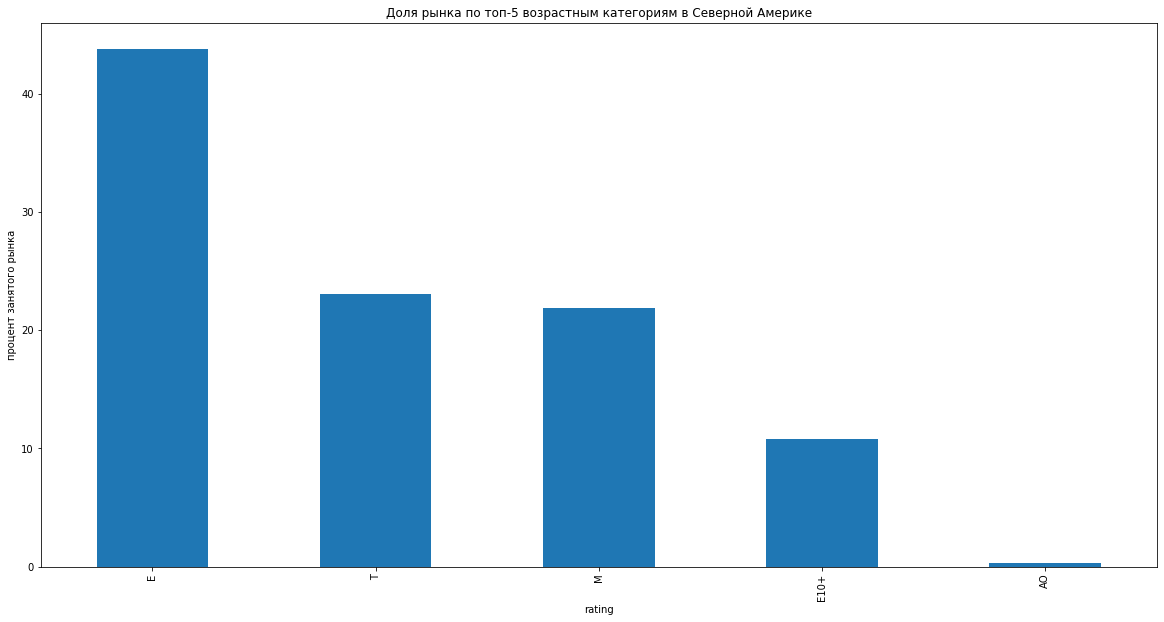

In [189]:
rating_sales_na['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 возрастным категориям в Северной Америке')
plt.ylabel('процент занятого рынка')
plt.show()

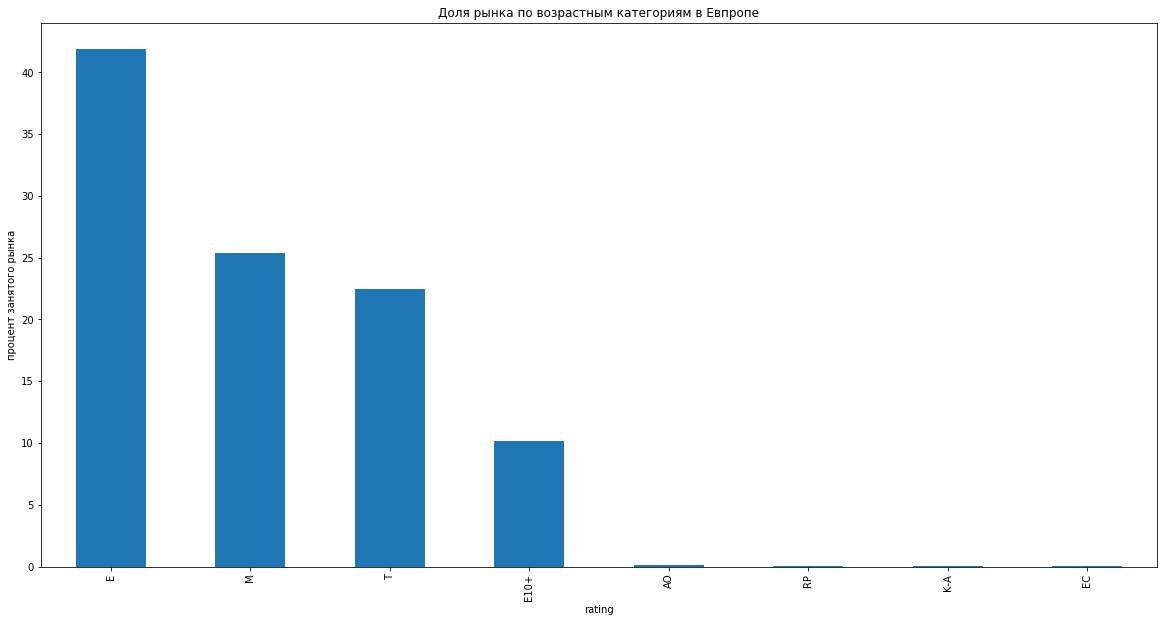

In [190]:
rating_sales_eu['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по возрастным категориям в Евпропе')
plt.ylabel('процент занятого рынка')
plt.show()

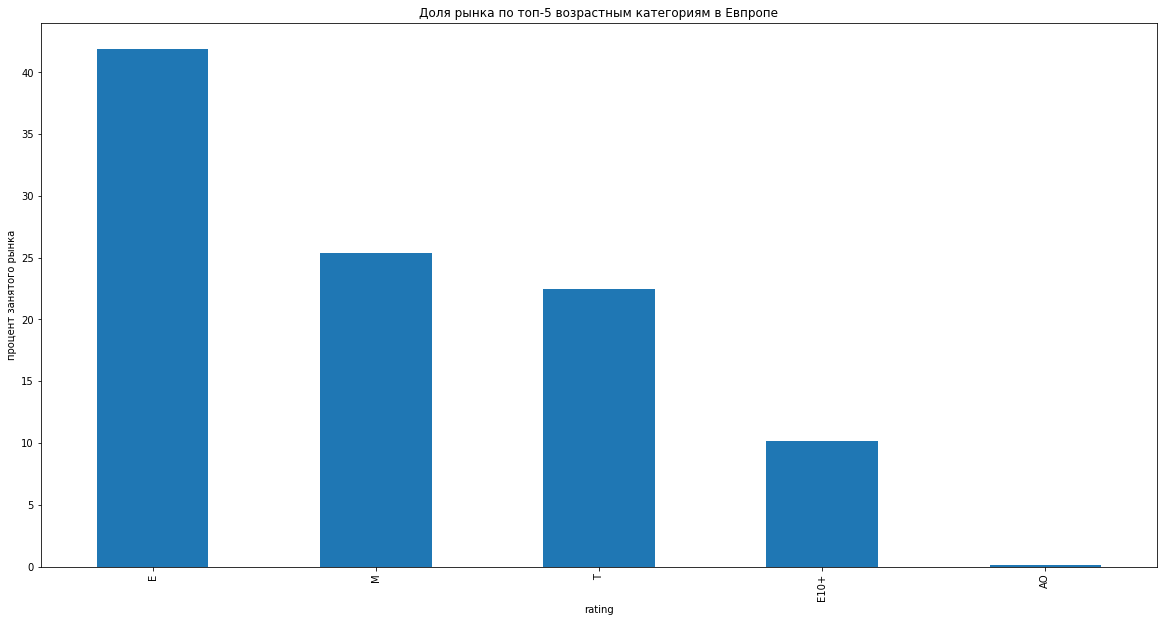

In [191]:
rating_sales_eu['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 возрастным категориям в Евпропе')
plt.ylabel('процент занятого рынка')
plt.show()

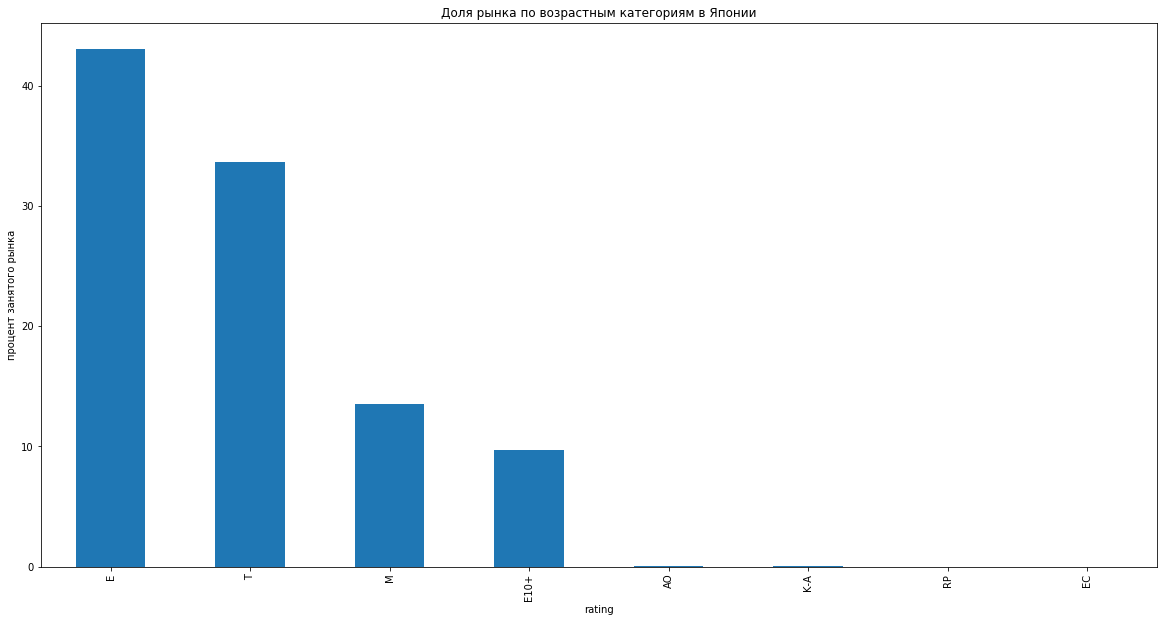

In [192]:
rating_sales_jp['sales_percent'].plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по возрастным категориям в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

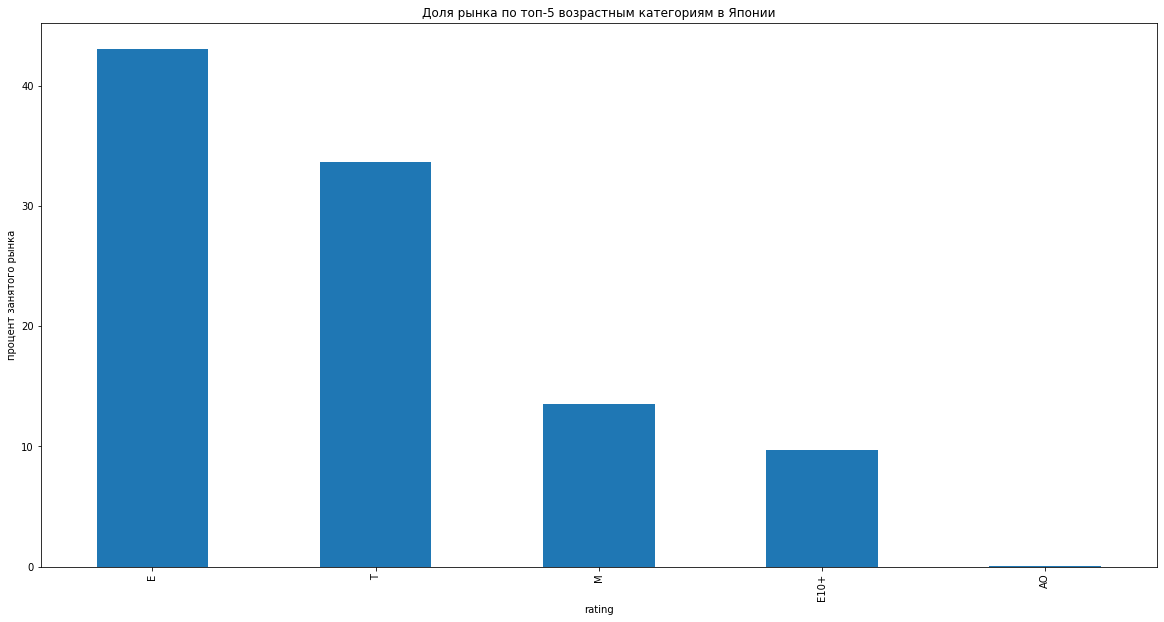

In [193]:
rating_sales_jp['sales_percent'].head().plot(kind='bar', figsize=(20,10))
plt.title('Доля рынка по топ-5 возрастным категориям в Японии')
plt.ylabel('процент занятого рынка')
plt.show()

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [194]:
display(current_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,нет оценки критиков,нет оценки пользователей,рейтинга нет,14.60
4,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,worms: wmd,XOne,2016,Action,0.01,0.00,0.00,0.00,75,8.1,E10+,0.01
2229,the book of unwritten tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,нет оценки критиков,нет оценки пользователей,T,0.01
2230,hyakka yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,нет оценки критиков,нет оценки пользователей,рейтинга нет,0.01
2231,doki-doki universe,PSV,2013,Adventure,0.00,0.01,0.00,0.00,66,5.7,E10+,0.01


Сделаем по 2 датафрейма - в первом будут только рейтинги по XBox , а во втором - только по PC. Так же добавим условие, что мы рассматриваем только те строки, где известна оценка пользователей

In [195]:
current_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Я так понял, что за XBox мы берём X360

In [196]:
data_xbox = current_period.query('(platform == "X360")&(user_score != "нет оценки пользователей")')[['platform', 'user_score']]

In [197]:
data_pc = current_period.query('(platform == "PC")&(user_score != "нет оценки пользователей")')[['platform', 'user_score']]

In [198]:
display(data_xbox)

,platform,user_score
1,X360,8.1
6,X360,2.6
37,X360,4.9
40,X360,4.2
56,X360,5.6
...,...,...
1967,X360,7.3
1996,X360,7.5
2056,X360,4.5
2076,X360,6.2


In [199]:
display(data_pc)

,platform,user_score
72,PC,3.9
157,PC,7.9
185,PC,2.2
194,PC,6
208,PC,5.4
...,...,...
2174,PC,5.3
2179,PC,4.3
2185,PC,7.3
2198,PC,7.1


Соответственно у нас есть 2 датафрейма со списком значений user_score, которые можно будет взять в качестве исходных данных для проверки гипотезы. Нулевой гипотезой в данном случае будет равенство средней оценки пользователей XBox и PC игр, а альтернативной - их неравенство.

In [200]:
alpha = 0.05

Пусть значение aplha будет 5 % - сооттветственно если p-value окажется меньше, то от выдвинутой гипотезы стоит отказаться

In [201]:
xbox_sample = list(data_xbox['user_score'])
pc_sample = list(data_pc['user_score'])

In [202]:
result = st.ttest_ind(xbox_sample, pc_sample) 

In [203]:
print('p-значение', result.pvalue)

p-значение 0.15705535885466684


In [204]:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - средние оценки пользователей XBox и PC вряд ли равны')
else:
    print('Нельзя отвергать нулевую гипотезу - средние оценки пользователей PC и XBox вполне могут быть равны')

Нельзя отвергать нулевую гипотезу - средние оценки пользователей PC и XBox вполне могут быть равны


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

В принципе тут будет почти идентичное исследование, как и с оценками пользователей PC и XBox. Единственное, будет обратная логика - если p-value окажется меньше alpha = 5 % , значит гипотеза о том, что оценки разные - правдива. А вот если p-value будет больше 0.05,то уже наоборот - оценки вполне могут быть равны.

In [205]:
current_period['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [206]:
data_action = current_period.query('(genre == "Action")&(user_score != "нет оценки пользователей")')[['genre', 'user_score']]
data_sports = current_period.query('(genre == "Sports")&(user_score != "нет оценки пользователей")')[['genre', 'user_score']]

In [207]:
display(data_action)

,genre,user_score
0,Action,8.2
1,Action,8.1
4,Action,8.3
20,Action,9.1
22,Action,7.9
...,...,...
2179,Action,4.3
2188,Action,2.8
2192,Action,3.1
2209,Action,7.9


In [208]:
display(data_sports)

,genre,user_score
9,Sports,4.3
12,Sports,5
18,Sports,4.3
19,Sports,5.7
38,Sports,4.5
...,...,...
2147,Sports,8.8
2150,Sports,6.9
2160,Sports,5.2
2168,Sports,6


In [209]:
action_sample = list(data_action['user_score'])
sports_sample = list(data_sports['user_score'])

In [210]:
result = st.ttest_ind(action_sample, sports_sample) 

In [211]:
print('p-значение', result.pvalue)

p-значение 1.0517832389140023e-27


In [212]:
if result.pvalue > alpha:
    print('Отвергаем нулевую гипотезу - средние оценки пользователей жанров Action и Sports вполне могут быть равны')
else:
    print('Нельзя отвергать нулевую гипотезу - средние оценки пользователей жанров Action и Sports действительно могут отличаться')

Нельзя отвергать нулевую гипотезу - средние оценки пользователей жанров Action и Sports действительно могут отличаться


## Общий вывод

Если говорить глобально об играх по предоставленному датафрейму - можем сказать, что до 1990 года игр было сравнительно мало отностиельно тех объёмов, которые пошли позже - вплоть до примерно 2010 года наблюдался стабильный рост продаж и выход на пик игровой индустрии, но потом начался упадок - возможно из-за вытеснения внимания пользователей играми на мобильные устройства, которых нет в этом датафрейме. Так же стоит отметить, что выстрелевшие игры, собравшие много миллионов копий продаж - чаще всего были дейстивительно одобрены и критиками до их выхода, но при этом есть огромное число игр с очень малыми продажами и совершенно разными отзывами критиков. А оценки пользователей вообще совершенно разные - есть ряд примеров игр по построенным диаграммам рассеивания, которые пользователи завалили, но сами игры показали себя очень хорошо в продажах.
PS4, XOne и 3DS - платформы с самым большим числом продаж за последние годы, и несмотря на общий спад в продажах так или иначе являются самыми перспективными платформами, на которые стоит выпускать игры. Однако важно отметить что 3DS уже довольно старая, и полагаясь на средний срок жизни платформы в 7 лет можно сказать, что она скоро начнёт уходить в закат, и конкретно её лучше не рассматривать как перспективную. Но если говорить локально (в данном исследовании о Северной Америке, Европе и Японии) - общие тенденции по популярным жанрам/платформам/рейтингам успешных игр довольно похожи в Америке и Европе, но во всех перечисленных категориях довольно отличаются в Японии, что может говорить о том, что по глобальным данным со всего мира нельзя прогнозировать успех того или иного проекта заранее в отдельном регионе.